## Business Understanding

#### Overview

##### What is sepsis?
Sepsis is a life-threatening medical emergency caused by your body’s overwhelming response to an infection. Without urgent treatment, it can lead to tissue damage, organ failure and death.

Sepsis is your body’s extreme reaction to an infection. When you have an infection, your immune system works to try to fight it. But sometimes your immune system stops fighting the infection and starts damaging your normal tissues and organs, leading to widespread inflammation throughout your body.

At the same time, an abnormal chain reaction in your clotting system can cause blood clots to form in your blood vessels. This reduces blood flow to the different organs of your body and can cause significant damage or even failure.

##### What are the three stages of sepsis?
Healthcare providers used to organize sepsis into three stages: sepsis, severe sepsis and septic shock. Now, they identify the condition on a more fluid scale. This scale ranges from infection and bacteremia (bacteria in your bloodstream) to sepsis and septic shock, which can lead to dysfunction of multiple organs and even death.

##### Who does sepsis affect?
Sepsis can affect anyone, but people with any kind of infection, especially bacteremia, are at a particularly high risk.

Other people who are at a high risk include:

People older than 65 years old, newborns and infants, and pregnant people.
People with medical conditions such as diabetes, obesity, cancer and kidney disease.
People with weakened immune systems.
People who are in the hospital for other medical reasons.
People with severe injuries, such as large burns or wounds.
People with catheters, IVs or breathing tubes.

##### How common is sepsis?

More than 1.7 million people in the United States receive a diagnosis of sepsis each year. There are differences in sepsis rates among different demographic groups. Sepsis is more common among older adults, with incidence increasing with each year after the age of 65 years old.
[Source](https://my.clevelandclinic.org/health/diseases/12361-sepsis)


#### Objective

The goal of this project is to create an API using FastAPI framework to predict if one is will be Positive or Negative for Sepsis

### Metric

Due to the life threatening nature of Sepsis it will be dangerous to predictive Negative if actual turns out to be Positive, ML model will seek to increase the **Precision score**

#### Dataset Description:

    The provided data is a modified version of a publicly available data source, and is subject to copyright.

Donor of database:

                     - The Johns Hopkins University
                     - Johns Hopkins Road
                     - Laurel, MD 20707
                     - (301) 953-6231

Licence agreement:

    The dataset can only be used for the purpose of this assignment. Sharing or distributing this data or using this data for any other commercial or non-commercial purposes is prohibited.


**Data Dictionary**
- ID: number to represent patient ID
- PRG: Plasma glucose
- PL: Blood Work Result-1 (mu U/ml)
- PR: Blood Pressure (mm Hg)
- SK: Blood Work Result-2 (mm)
- TS: Blood Work Result-3 (mu U/ml)
- M11: Body mass index (weight in kg/(height in m)^2)
- BD2: Blood Work Result-4 (mu U/ml)
- Age: patients age (years)
- Insurance: If a patient holds a valid insurance card
- Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise



#### ANALYTICAL QUESTIONS

1) What is the proportion of patients with a valid insurance card?

2) What is the distribution of body mass index (BMI) in the dataset?

3) How does blood pressure (PR) vary with age among patients?

4) Does the presence of valid insurance affect the likelihood of developing sepssis?

5) What is the link between Age, Body mass index (M11) and Sepsis

#### HYPOTHESIS
1) 
The null hypothesis : Patient's Insurance does not influence Sepssis

The alternate hypothesis : Patient's Insurance influences Sepssis

2) 
The null hypothesis : There is no correlation between Blood Work Result-1 (PL) and Blood Work Result-2 (SK)

The alternate hypothesis : There is a correlation between Blood Work Result-1 (PL) and Blood Work Result-2 (SK)

3) 
The null hypothesis : - There is no correlation between blood pressure (PR) and the likelihood of developing sepsis?

The alternate hypothesis : There is a correlation between blood pressure (PR) and the likelihood of developing sepsis?

4) 
The null hypothesis : Age does not have a significant impact on the development of sepsis in patients

The alternate hypothesis : Age has a significant impact on the development of sepsis in patients

5) 
The null hypothesis: There a no significant difference in plasma glucose levels between patients who develop sepsis and those who do not?

The Alternative hypothesis: There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not?

6) 
The Null Hypothesis (H0): There is no significant difference in Blood Work Results between patients who develop sepssis and those who do not.

The Alternative Hypothesis (H1): There is a significant difference in Blood Work Results between patients who develop sepsis and those who do not.

In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu

from scipy.stats import ttest_ind

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder, 
    LabelEncoder, 
    RobustScaler, 
    StandardScaler,
    FunctionTransformer
)

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif 
from sklearn.model_selection import train_test_split 


from sklearn.base import BaseEstimator, TransformerMixin
from Custom_Transformers import LogTransformer, SqrtTransformer, BoxCoxTransformer
from scipy import stats


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier
)

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import HuberRegressor

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_curve,
    auc, 
    confusion_matrix, 
    classification_report
)

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV
from scipy.stats import chi2_contingency
import joblib



import warnings
warnings.filterwarnings('ignore')


In [3]:
# Create a dataframe
pfiles_df = pd.read_csv('../Data/Paitients_Files_Train.csv')

### Exploratory Data Analysis: EDA

In [4]:
# size of dataframe
pfiles_df.shape

(599, 11)

In [5]:
# retrieve the first 5 rows
pfiles_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [6]:
# information on the dataframe
pfiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [7]:
# statistics on the dataframe
pfiles_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [8]:
# checking for miassing values
pfiles_df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [9]:
# checking for duplicates
pfiles_df.duplicated().sum()

np.int64(0)

##### OBSERVATION

- There are no missing values in the dataset.
- There are no duplicates in the dataset.
- The average age of patients is recorded as 33 years, with a minimum age of 21 years and a maximum age of 81 years.
- The average body mass index (BMI) is recorded as 31.99 kg/m², with the highest BMI being 67 kg/m².

#### Univariate Analysis

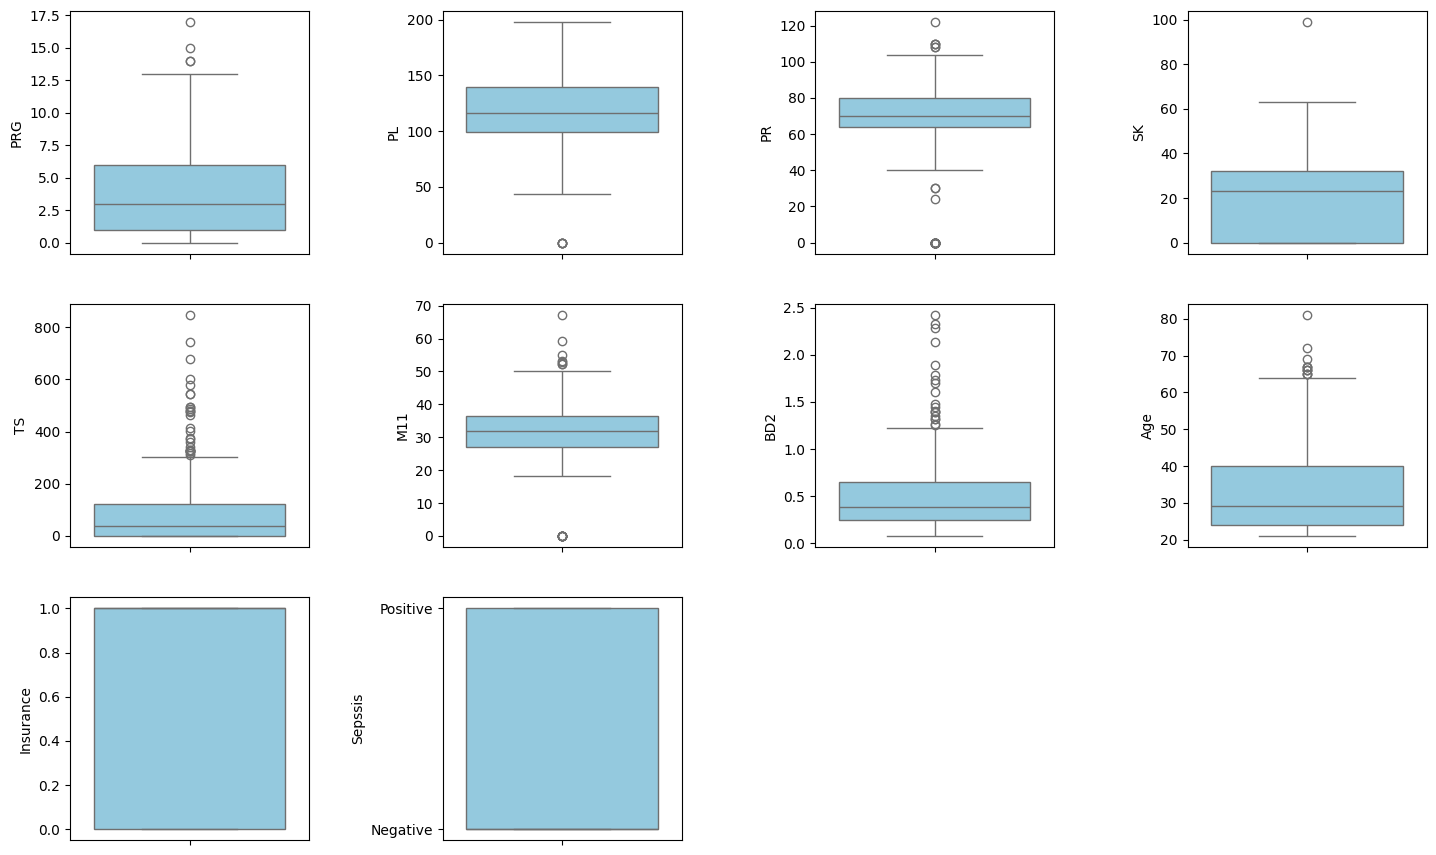

In [10]:

pfiles_df_noid = pfiles_df.drop(['ID'], axis=1)
# plotting box plot
plt.figure(figsize=(15, 15))

for i, variable in enumerate(pfiles_df_noid):
    plt.subplot(5,4, i + 1)
    sns.boxplot(pfiles_df,y=pfiles_df[variable], color= 'skyblue')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

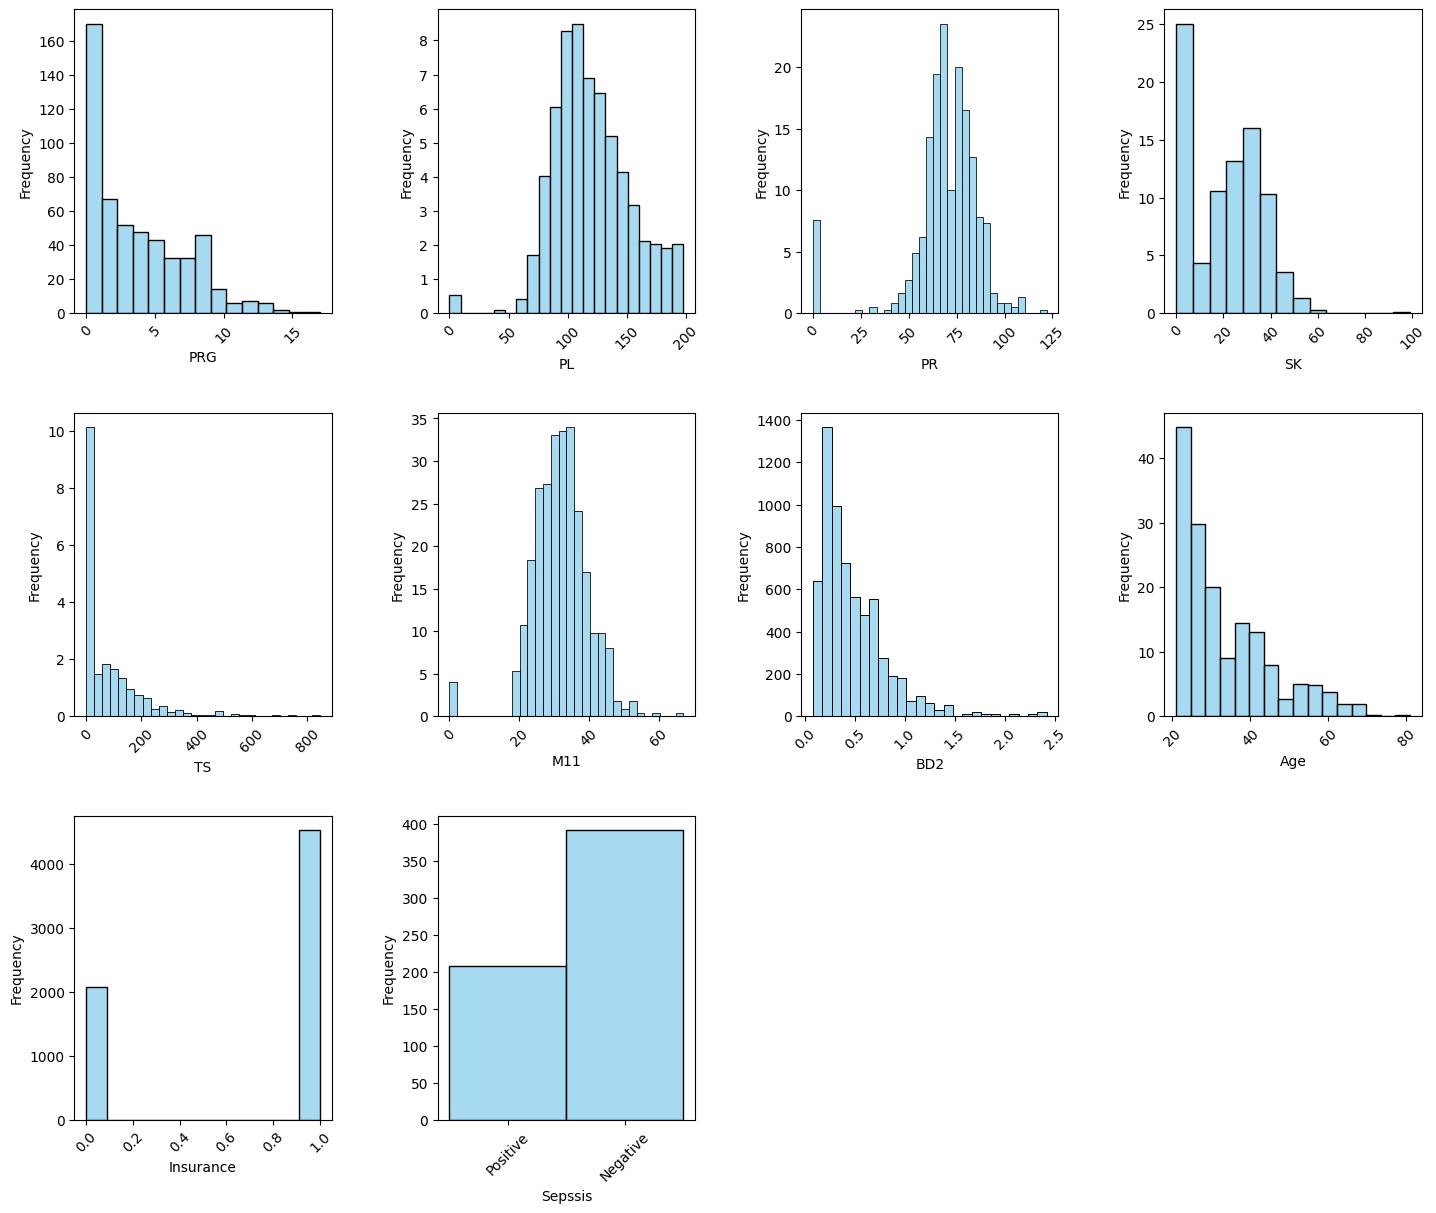

In [11]:
plt.figure(figsize=(15, 20))
# plotting histogram plot
for i, variable in enumerate(pfiles_df_noid):
    plt.subplot(5,4, i + 1)
    sns.histplot(pfiles_df,x=pfiles_df[variable], stat='frequency', color='skyblue')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

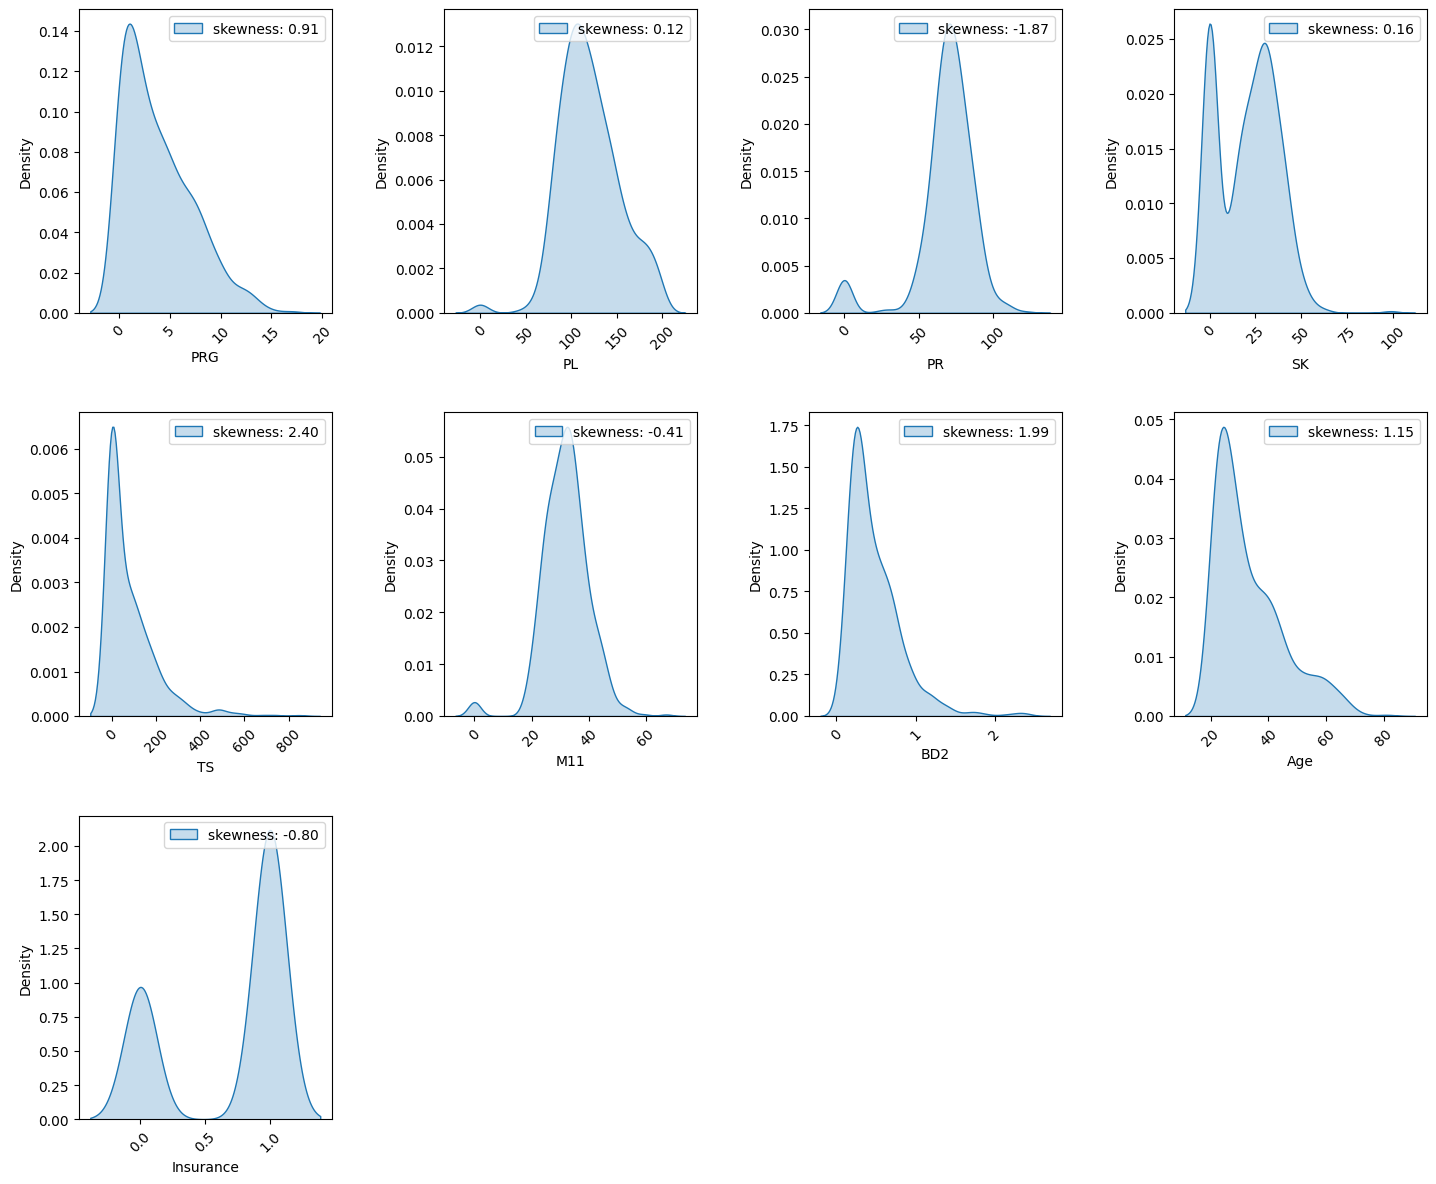

In [12]:
# Plot a Kernel density plot for the variables
plt.figure(figsize=(15, 20))
# plotting KDE plot
for i, variable in enumerate(pfiles_df_noid.drop(['Sepssis'], axis=1)):
    plt.subplot(5,4, i + 1)
    sns.kdeplot(pfiles_df,x=pfiles_df[variable],label= 'skewness: %.2f'%(pfiles_df[variable].skew()), fill = True,)
    plt.tight_layout(pad=3)
    plt.legend(loc = 'upper right')
    plt.xticks(rotation=45)

##### OBSERVATION
- Few variables show Negative skewness such as Insurance, Body Mass index (M11), Blood pressure (PR)
- Other variables show Positive skewness of which some have high posiitive skewness e.g Blood work result 3 (TS) and Blood work result 4 (BD2), while some have low posiitive skewness e.g Plasma glucose (PRG), Age, Blood Work result 2(SK), Blood Work result 1 (PL)

#### Bivariate & Multivariate Analysis

In [13]:
# Filter out non-numerical columns
numerical_columns = pfiles_df.select_dtypes(include=['number']).columns

# Create a new DataFrame with only numerical columns
pfiles_numerical = pfiles_df[numerical_columns]

# Separate the DataFrame into positive and negative sepsis cases
pfiles_positive = pfiles_numerical[pfiles_df['Sepssis'] == 'Positive']
pfiles_negative = pfiles_numerical[pfiles_df['Sepssis'] == 'Negative']

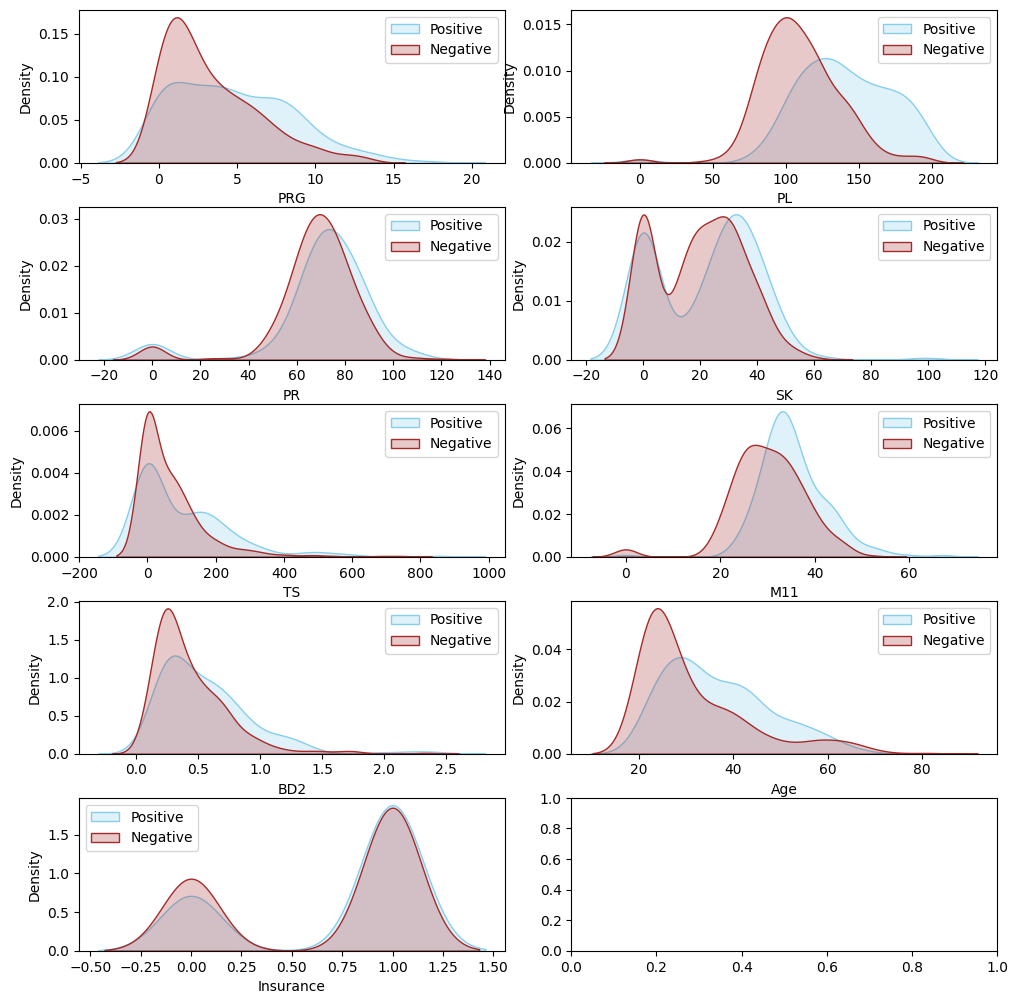

In [14]:
# Plot a kernel density plot for the negative and positive sepssis within all variables
num_rows, num_cols = 5, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
fig.tight_layout()

for index, column in enumerate(numerical_columns):
    ax = axes[index // num_cols, index % num_cols]
    sns.kdeplot(pfiles_positive[column], color='skyblue', fill=True, ax=ax, label='Positive')
    sns.kdeplot(pfiles_negative[column], color='brown', fill=True, ax=ax, label='Negative')
    ax.set_xlabel(column)
    ax.legend()
plt.show()

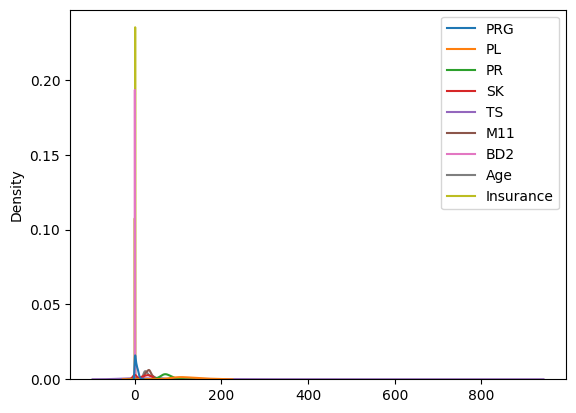

In [15]:
# plotting KDE plot
sns.kdeplot(data=pfiles_df_noid)
plt.show()

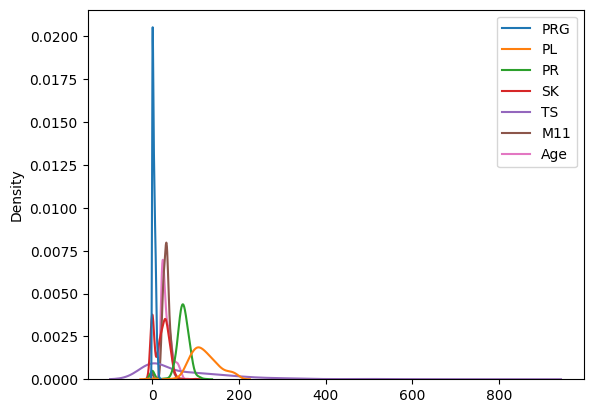

In [16]:
# plotting KDE plot
sns.kdeplot(data=pfiles_df_noid.drop(['Insurance','BD2'], axis=1))
plt.show()

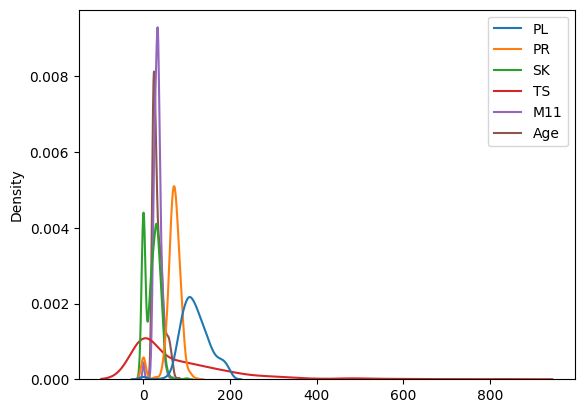

In [17]:
# plotting KDE plot
sns.kdeplot(data=pfiles_df_noid.drop(['Insurance','BD2', 'PRG'], axis=1))
plt.show()

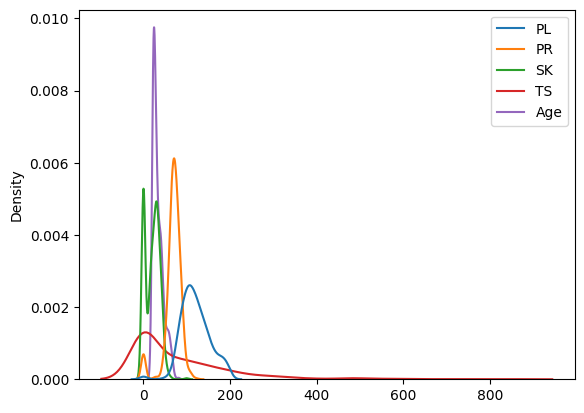

In [18]:
# plotting KDE plot
sns.kdeplot(data=pfiles_df_noid.drop(['Insurance','BD2', 'PRG', 'M11'], axis=1))
plt.show()

In [19]:
# skewness for each variable
pfiles_df_noid.drop(['Sepssis'], axis=1).skew()

PRG          0.914008
PL           0.116180
PR          -1.874662
SK           0.164063
TS           2.401585
M11         -0.405255
BD2          1.989472
Age          1.152353
Insurance   -0.804257
dtype: float64

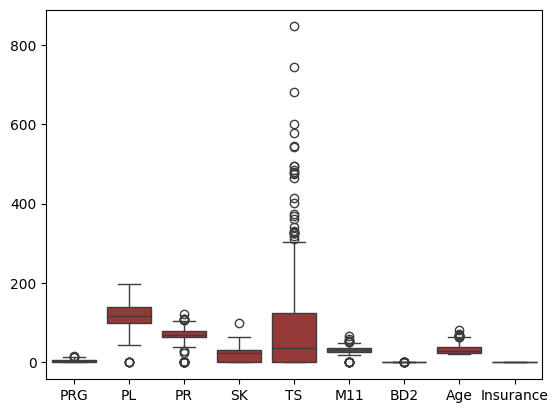

In [61]:
# plotting box plot
sns.boxplot(data=pfiles_df_noid, color = 'brown')
plt.show()

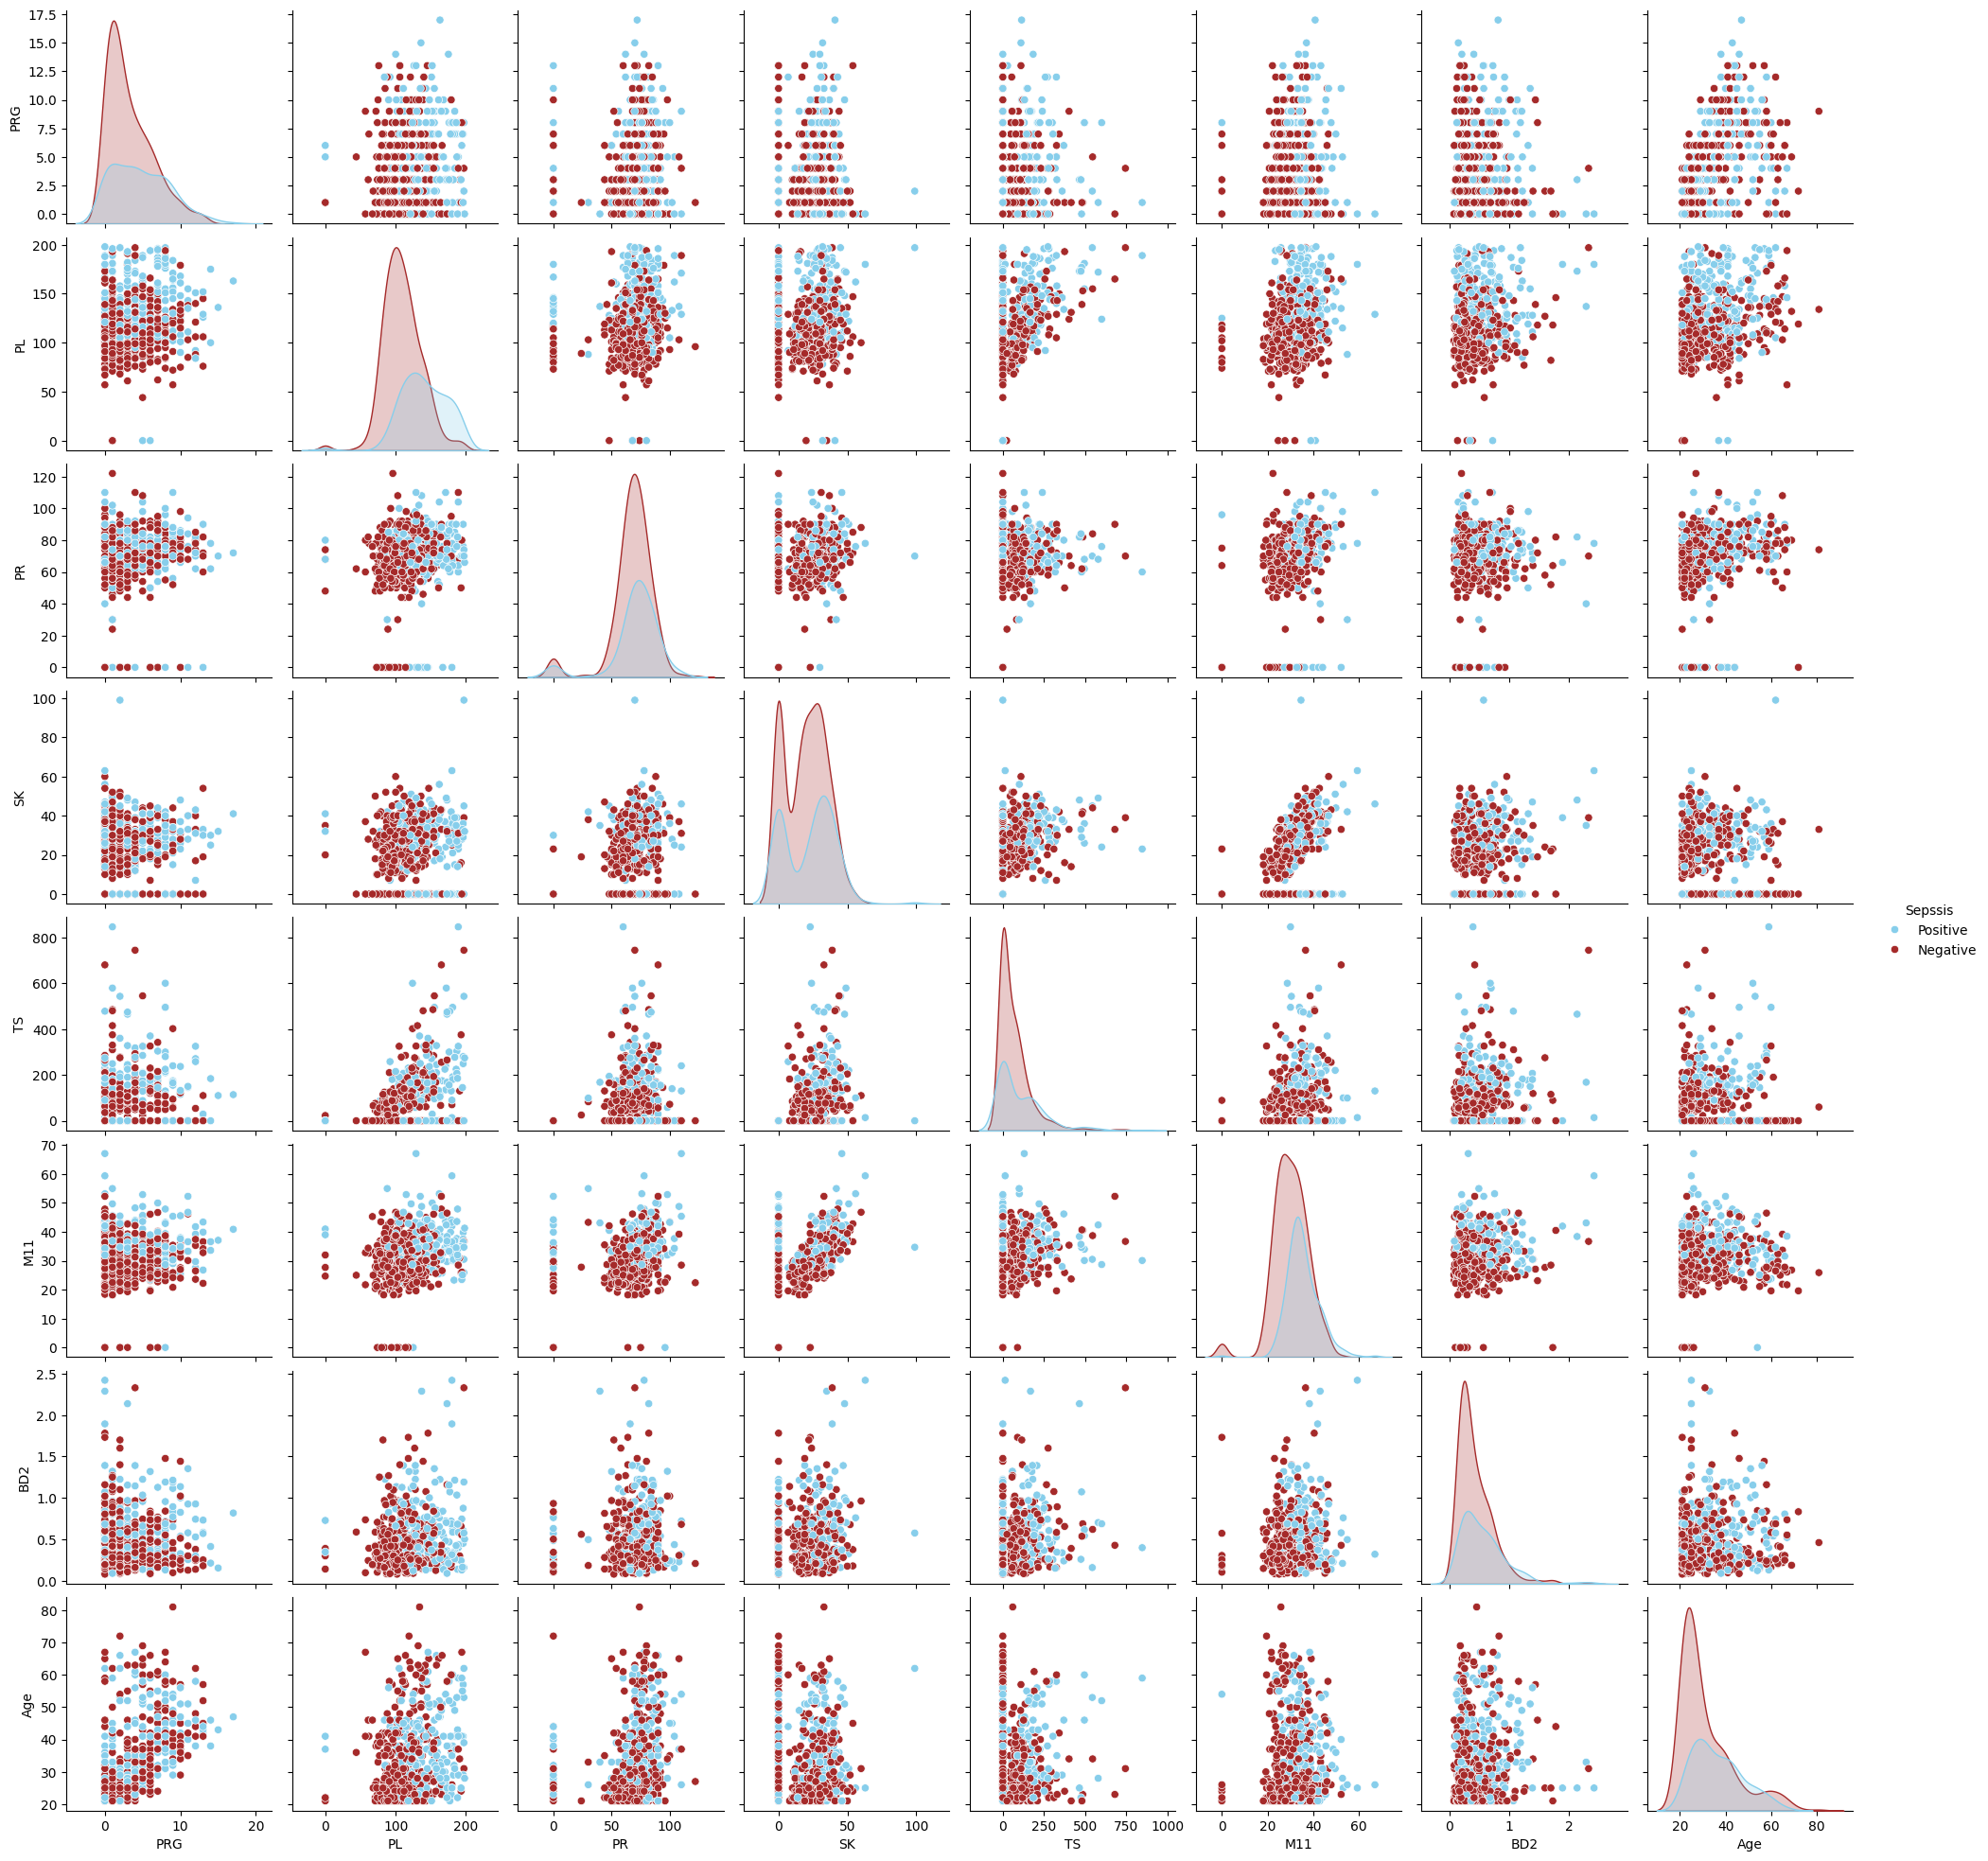

In [21]:
# plotting pair plot
sns.pairplot(data=pfiles_df_noid.drop(['Insurance'], axis=1), hue='Sepssis', palette=['skyblue','brown'])
plt.show()

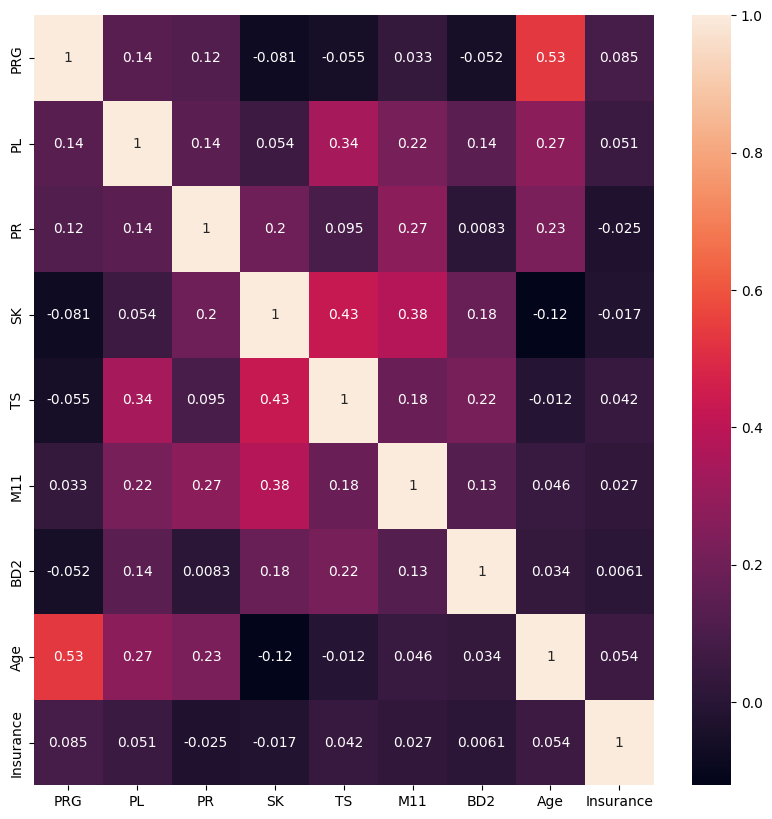

In [22]:
# plotting heatmap for correlatiuon between each variable
plt.figure(figsize=(10, 10))
sns.heatmap(data=pfiles_df_noid.drop(['Sepssis'], axis=1).corr(), annot=True)
plt.show()

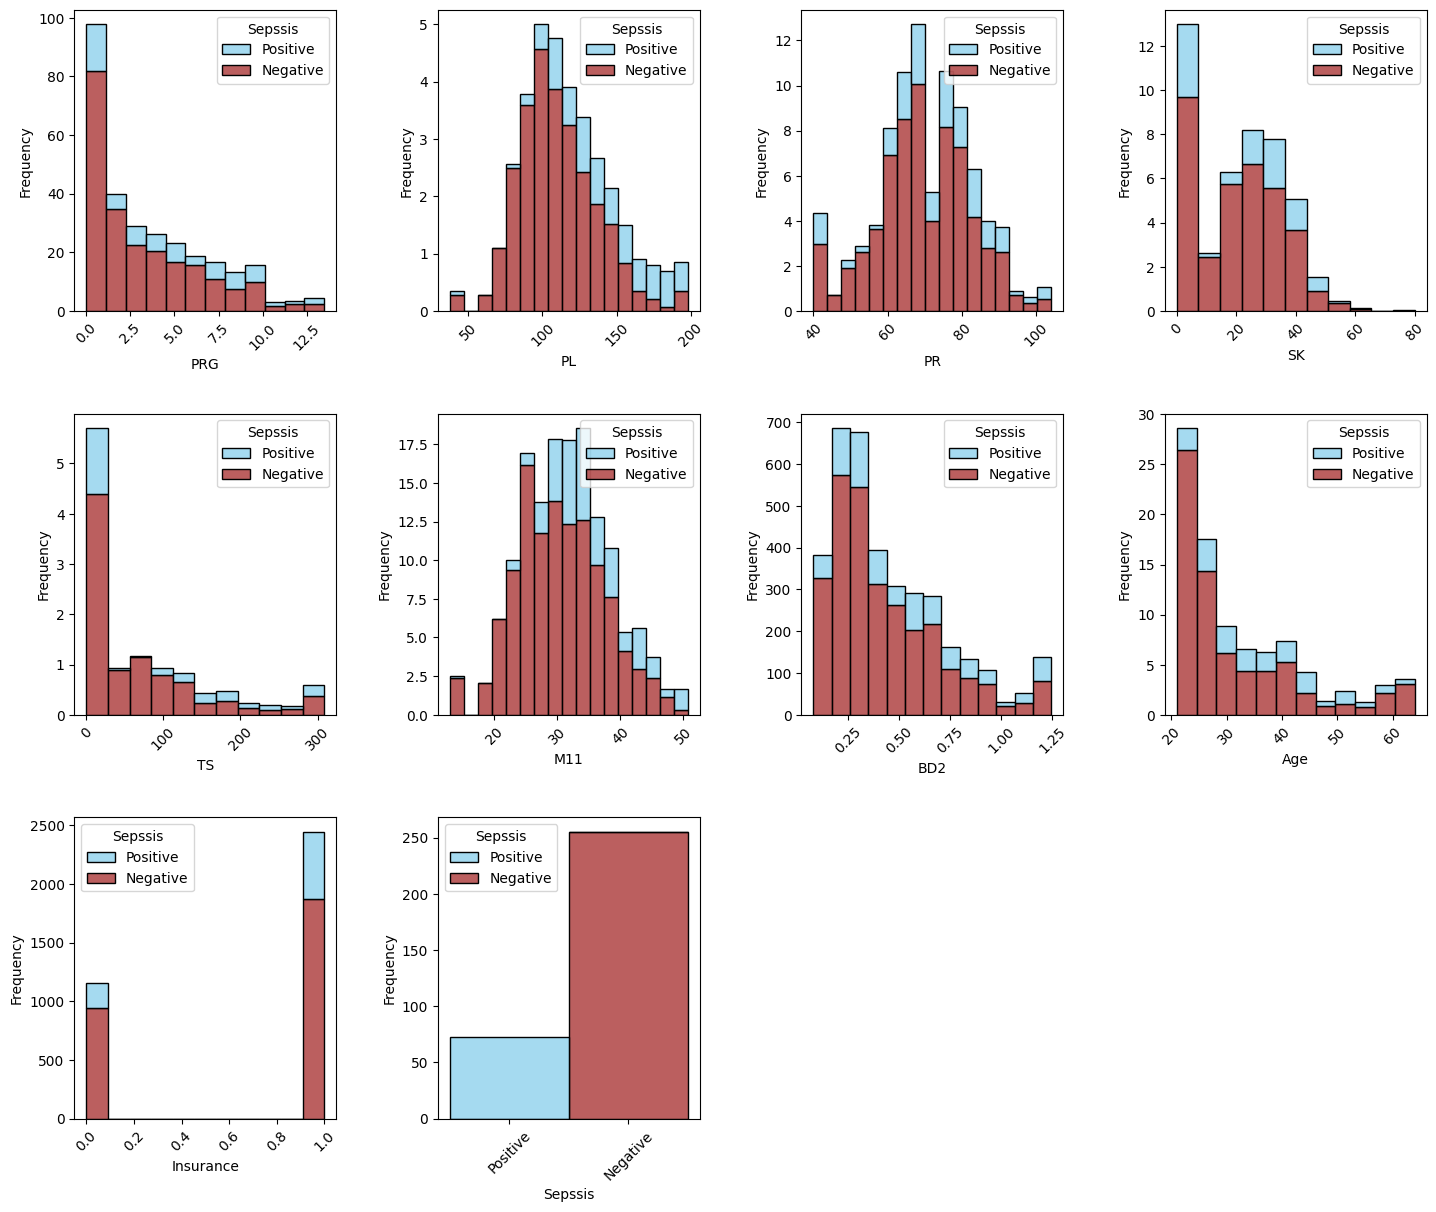

In [59]:
plt.figure(figsize=(15, 20))
# plotting histogram plot
for i, variable in enumerate(pfiles_df_noid):
    plt.subplot(5,4, i + 1)
    sns.histplot(pfiles_df,x=pfiles_df[variable], stat='frequency', hue='Sepssis', multiple='stack', palette=['skyblue','brown'])
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)
    

##### OBSERVATION
- Blood work result -2 (SK) and Blood work result -3 (TS) has a good positive correlation, same goes with AGE and Plasma glucose (PRG)
- Positive sepssis and negative sepsis are skewly distributed within the ages, although Positive sepssis is overly skewed. Same goes with Blood work result -4 (BD2) and Blood work result -3 (TS).

#### ANALYTICAL QUESTIONS

##### Question 1

What is the proportion of patients with a valid insurance card?

In [24]:
# create a copy of dataframe
pfiles = pfiles_df.copy()
# Replacing the values
pfiles['Insurance'] = pfiles['Insurance'].map({0: 'Invalid', 1: 'Valid'})

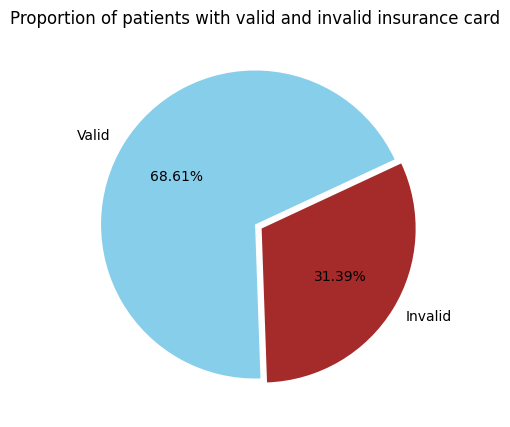

In [25]:
# Getting the counts of Insurance 
Patient_counts = pfiles['Insurance'].value_counts()
explode = [0.05 if label == 'Invalid' else 0 for label in Patient_counts.index]
# Plot a pie chart for the variables
plt.figure(figsize=(5, 5))
plt.pie(Patient_counts, labels=Patient_counts.index, explode=explode, autopct='%1.2f%%', startangle=25, colors=['skyblue', 'brown'])
plt.title('Proportion of patients with valid and invalid insurance card')
plt.show()

- The proportion of patients with valid and invalid insurance is 68.61% and 31.39% respectivel

#### Question 2

How does blood pressure (PR) vary with age among patients?

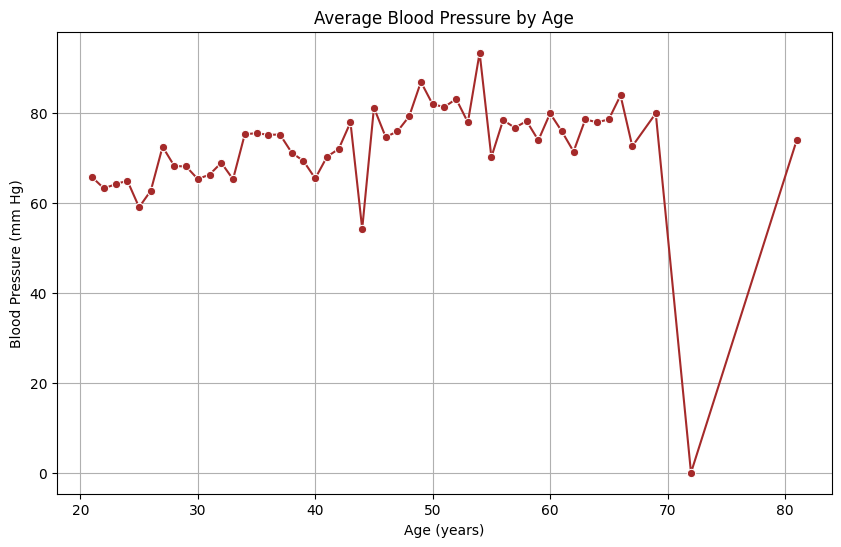

In [26]:
# Grouping the age and blood pressure and retrieving the average of PR
Age_pressure = pfiles.groupby('Age')['PR'].mean().reset_index()
# Plotting line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='PR', data=Age_pressure, marker='o', color='brown')
plt.title('Average Blood Pressure by Age')
plt.xlabel('Age (years)')
plt.ylabel('Blood Pressure (mm Hg)')
plt.grid(True)
plt.show()

- The highest average blood pressure (85mm/Hg) is recorded at 52 years of age, while the age with the lowest average blood pressure (0mm/Hg) is 71 years.

#### Question 3

Does the presence of valid insurance affect the likelihood of developing sepsis?

In [27]:
# Grouping Insurance to sepssis
insurance_sepssis = pfiles.groupby('Insurance')['Sepssis'].value_counts().reset_index()
insurance_sepssis

,Insurance,Sepssis,count
0,Invalid,Negative,131
1,Invalid,Positive,57
2,Valid,Negative,260
3,Valid,Positive,151


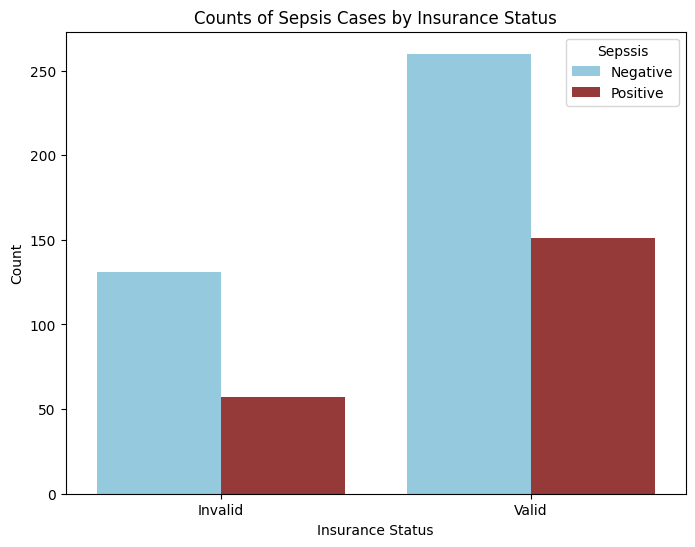

In [28]:
# Plotting bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Insurance', y='count', hue='Sepssis', data=insurance_sepssis, palette=['skyblue', 'brown'])
plt.title('Counts of Sepsis Cases by Insurance Status')
plt.xlabel('Insurance Status')
plt.ylabel('Count')
plt.show()

- The presence of valid insurance affects the likelihood of developing sepsis, mostly due to its high record rate compared to the invalid insurance rate

##### Question 4

How does the average body mass index (BMI) differ between patients who develop sepsis and those who do not?

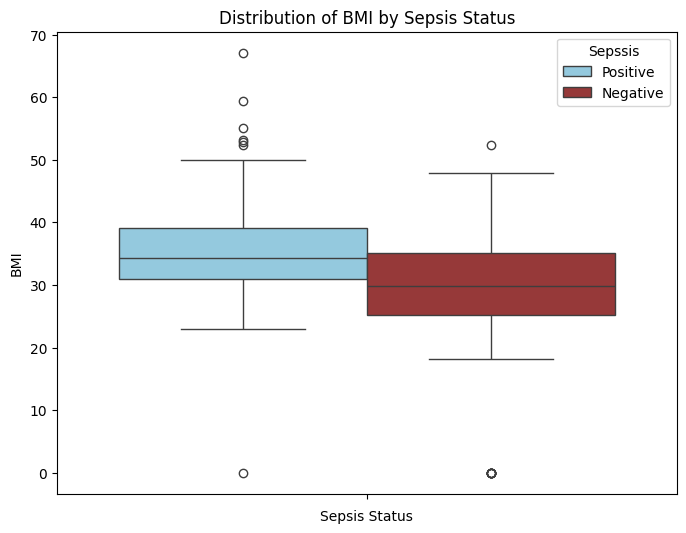

In [29]:
# Plotting box plot
plt.figure(figsize=(8, 6))
sns.boxplot(hue='Sepssis', y='M11', data=pfiles, palette=['skyblue', 'brown'], legend =True)
plt.title('Distribution of BMI by Sepsis Status')
plt.xlabel('Sepsis Status')
plt.ylabel('BMI')
plt.show()

- The average BMI (M11) Hits at 34kg with patients who test positive to sepssis, which is higher than patients who do not develop sepssis (30kg)

##### Question 5

What is the link between Age, Body mass index (M11) and Sepsis

In [62]:
pfiles.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,Invalid,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,Invalid,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,Valid,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,Valid,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,Valid,Positive


In [31]:
# retrieving column sepssis, M11 and Age
age_m11_sep = pfiles[['Sepssis', 'M11', 'Age']]

age_m11_sep

,Sepssis,M11,Age
0,Positive,33.6,50
1,Negative,26.6,31
2,Positive,23.3,32
3,Negative,28.1,21
4,Positive,43.1,33
...,...,...,...
594,Negative,33.6,34
595,Positive,32.0,22
596,Negative,45.3,46
597,Negative,27.8,21


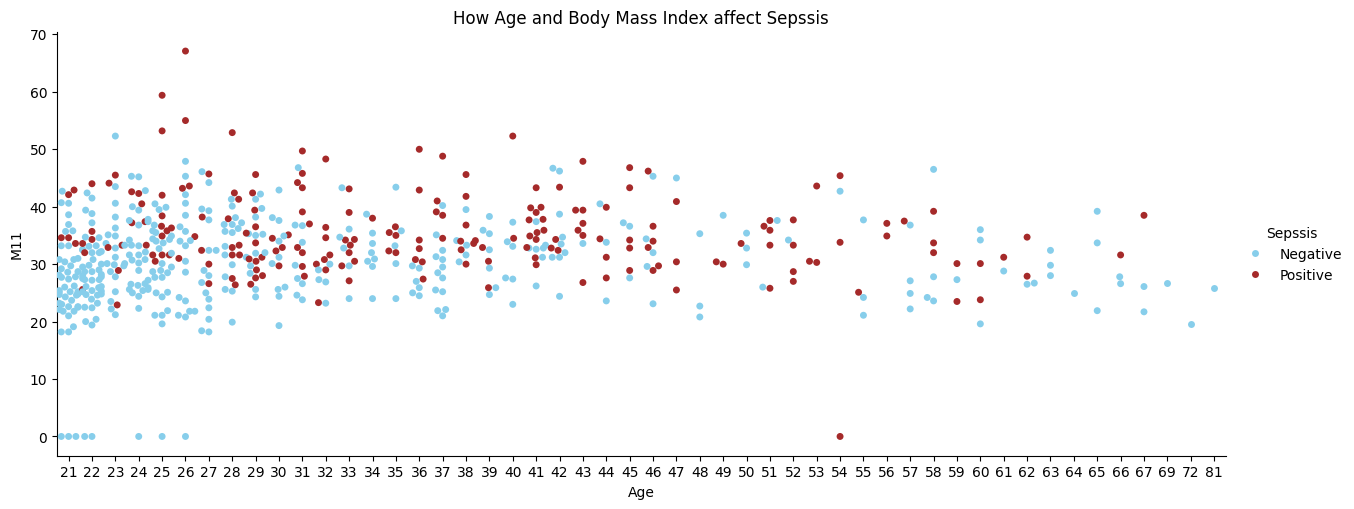

In [32]:
# plotting swarm plot
sns.catplot(age_m11_sep, x ='Age', y = 'M11', hue='Sepssis', kind='swarm', aspect=2.5, palette=['skyblue','brown'])
plt.title('How Age and Body Mass Index affect Sepssis')
plt.show()

#### Observations

- People with M11 below 30 tend to record more negative Sepssis across all ages, but especially between ages 21 to 30

### HYPOTHESIS

1.
The null hypothesis : Patient's Insurance does not influence Sepssis

The alternate hypothesis : Patient's Insurance influences Sepssis

HYPOTHESIS TEST: CHI-SQUARE TEST OF INDEPENDENCE

In [33]:
# cross tabulate the pair
insurance_sepssis = pd.crosstab(pfiles['Insurance'], pfiles['Sepssis'])

# Perform the chi-square test
chi2, p, dof, expected  = chi2_contingency(insurance_sepssis)
# Print the results
print(f"Chi-squared:", {chi2})
print(f"p-value:", {p})
print(f"Degrees of freedom:", {dof})
print(f"Expected frequencies:", expected)
# our significance level
α = 0.05
# Comparing the p-value with α
if p < 0.05:
    print(f"As the p-value {p} is less than the level of significance, we reject that the Patient's Insurance does not influence Sepssis.")
else:
    print(f"As the p-value {p} is greater than the level of significance, we fail to reject that the Patient's Insurance does not influence Sepssis.")

Chi-squared: {np.float64(2.0712782081677066)}
p-value: {np.float64(0.1500956791860619)}
Degrees of freedom: {1}
Expected frequencies: [[122.71786311  65.28213689]
 [268.28213689 142.71786311]]
As the p-value 0.1500956791860619 is greater than the level of significance, we fail to reject that the Patient's Insurance does not influence Sepssis.


2.
The null hypothesis : There is no correlation between Blood Work Result-1 (PL) and Blood Work Result-2 (SK)

The alternate hypothesis : There is a correlation between Blood Work Result-1 (PL) and Blood Work Result-2 (SK)

HYPOTHESIS TEST: PEARSONR TEST

In [34]:
# Calculate the Pearson correlation coefficient
r, p = pearsonr(pfiles_df["PL"], pfiles_df["SK"])

print("Correlation coefficient (r):", r)
print("p-value:", p)

Correlation coefficient (r): 0.05442990074670593
p-value: 0.18340395562212572


In [35]:
# our significance level
α = 0.05
# Comparing the p-value with α
if p < α:
    print(f'As the p-value {p} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.18340395562212572 is greater than the level of significance, we fail to reject the null hypothesis.


3.
The null hypothesis : - There is no correlation between blood pressure (PR) and the likelihood of developing sepsis?

The alternate hypothesis : There is a correlation between blood pressure (PR) and the likelihood of developing sepsis?

HYPOTHESIS TEST: MANN-WHITNEY U Test:

In [36]:
Positive_PR = pfiles[pfiles['Sepssis'] == 'Positive']['PR']
Negative_PR = pfiles[pfiles['Sepssis'] == 'Negative']['PR']

# Mann-Whitney U Test
u_stat, p_val = mannwhitneyu(Positive_PR, Negative_PR)
print(f"Mann-Whitney U statistic: {u_stat}")
print(f"P-value: {p_val}")

Mann-Whitney U statistic: 47673.5
P-value: 0.0005014049708706393


In [37]:
# our significance level
α = 0.05
# Comparing the p-value with α
if p_val < 0.05:
    print(f"As the p-value {p_val} is less than the level of significance, we reject the Null Hypothesis.")
else:
    print(f"As the p-value {p_val} is greater than the level of significance, we fail to reject the Null Hypothesis.")

As the p-value 0.0005014049708706393 is less than the level of significance, we reject the Null Hypothesis.


4.
The null hypothesis : Age does not have a significant impact on the development of sepsis in patients

The alternate hypothesis : Age has a significant impact on the development of sepsis in patients

HYPOTHESIS TEST: MANN-WHITNEY U Test:

In [38]:
# Filter the Ages for each sepssis
positive_age = pfiles[pfiles['Sepssis']== 'Positive']['Age']
negative_age = pfiles[pfiles['Sepssis']== 'Negative']['Age']

# Mann-Whitney U Test
u_stat, p_val = mannwhitneyu(positive_age, negative_age)
print(f"Mann-Whitney U statistic: {u_stat}")
print(f"P-value: {p_val}")

Mann-Whitney U statistic: 54836.5
P-value: 1.9719624253603723e-12


In [39]:
# our significance level
α = 0.05
# Comparing the p-value with α
if p_val < 0.05:
    print(f"As the p-value {p_val} is less than the level of significance, we reject the Null Hypothesis.")
else:
    print(f"As the p-value {p_val} is greater than the level of significance, we fail to reject the Null Hypothesis.")

As the p-value 1.9719624253603723e-12 is less than the level of significance, we reject the Null Hypothesis.


5

The null hypothesis: There a no significant difference in plasma glucose levels between patients who develop sepsis and those who do not?

The Alternative hypothesis: There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not?

HYPOTHESIS TEST: MANN-WHITNEY U Test

In [40]:
# Separate the groups based on sepsis outcome
sepsis_positive = pfiles[pfiles['Sepssis'] == 'Positive']['PRG']
 
sepsis_negative = pfiles[pfiles['Sepssis'] == 'Negative']['PRG']
 
# Perform the Mann-Whitney U Test
stat, p_value = mannwhitneyu(sepsis_positive, sepsis_negative)
 
# Print the results
print(f'Mann-Whitney U Test: U-statistic = {stat}, \n  p-value = {p_value}')
 
# Interpretation of the results
if p_value < 0.05:
    print('There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not.')
else:
    print('There is no significant difference in plasma glucose levels between patients who develop sepsis and those who do not.')

Mann-Whitney U Test: U-statistic = 49635.0, 
  p-value = 7.517335229649623e-06
There is a significant difference in plasma glucose levels between patients who develop sepsis and those who do not.


6

The Null Hypothesis (H0): There is no significant difference in Blood Work Results between patients who develop sepssis and those who do not.

The Alternative Hypothesis (H1): There is a significant difference in Blood Work Results between patients who develop sepsis and those who do not.

HYPOTHESIS TEST: MANN-WHITNEY U Test

In [41]:
blood_work_columns = ['PL', 'SK', 'TS', 'BD2']

# Initialize a dictionary to store test results
results = {} 
 
# Separate the groups based on sepsis outcome
sepsis_positive = pfiles[pfiles['Sepssis'] == 'Positive']
sepsis_negative = pfiles[pfiles['Sepssis'] == 'Negative']
 
# Perform the Mann-Whitney U Test for each blood work result
for col in blood_work_columns:
    positive_values = sepsis_positive[col]
    negative_values = sepsis_negative[col]
   
    # Perform the test
    stat, p_value = mannwhitneyu(positive_values, negative_values)
   
    # Store the results
    results[col] = {'U-statistic': stat, 'p-value': p_value}

In [42]:
# Print the results
for col, result in results.items():
    print(f'Blood Work Result: {col}')
    print(f"  U-statistic: {result['U-statistic']}")
    print(f"  p-value: {result['p-value']}")
    if result['p-value'] < 0.05:
        print('  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.\n')
    else:
        print('  There is no significant difference in this blood work result between patients who develop sepsis and those who do not.\n')

Blood Work Result: PL
  U-statistic: 63515.5
  p-value: 9.039444101550678e-30
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.

Blood Work Result: SK
  U-statistic: 44975.5
  p-value: 0.0303558775856338
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.

Blood Work Result: TS
  U-statistic: 44619.5
  p-value: 0.03737172167275455
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.

Blood Work Result: BD2
  U-statistic: 49738.5
  p-value: 6.800958896250743e-06
  There is a significant difference in this blood work result between patients who develop sepsis and those who do not.



### MODELLING

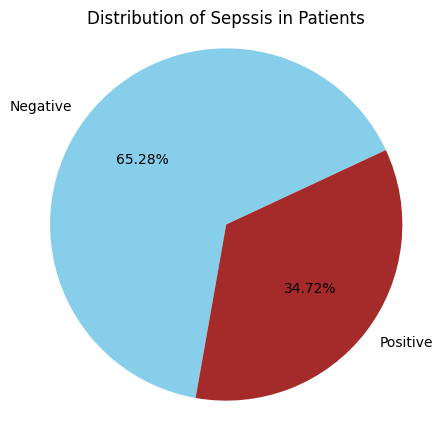

In [43]:
# Getting the counts of Sepssis

sepssis_counts = pfiles_df['Sepssis'].value_counts()
explode = [0.05 if label == 'Yes' else 0 for label in sepssis_counts.index]

plt.figure(figsize=(5, 5))  
plt.pie(sepssis_counts, labels=sepssis_counts.index, explode=explode, autopct='%1.2f%%', startangle=25, colors=['skyblue', 'brown'])
plt.axis('equal')
plt.title('Distribution of Sepssis in Patients')
plt.show()

#### Feature Engineering

In [44]:
# Treating outliers
def replace_outliers(pfiles_df):
        for column_name in pfiles_df.select_dtypes(include=['number']).columns:
            Q1 = pfiles_df[column_name].quantile(0.25)
            Q3 = pfiles_df[column_name].quantile(0.75)
            IQR = Q3 - Q1

            LOWER_BOUND = Q1 - 1.5 * IQR
            UPPER_BOUND = Q3 + 1.5 * IQR

            pfiles_df[column_name] = pfiles_df[column_name].apply(lambda x: UPPER_BOUND if x> UPPER_BOUND else (LOWER_BOUND if x< LOWER_BOUND else x))

        return pfiles_df

In [45]:
pfiles_df1= replace_outliers(pfiles_df)

In [46]:
pfiles_df1.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6.0,148.0,72.0,35.0,0.0,33.6,0.6270,50.0,0,Positive
1,ICU200011,1.0,85.0,66.0,29.0,0.0,26.6,0.3510,31.0,0,Negative
2,ICU200012,8.0,183.0,64.0,0.0,0.0,23.3,0.6720,32.0,1,Positive
3,ICU200013,1.0,89.0,66.0,23.0,94.0,28.1,0.1670,21.0,1,Negative
4,ICU200014,0.0,137.0,40.0,35.0,168.0,43.1,1.2455,33.0,1,Positive


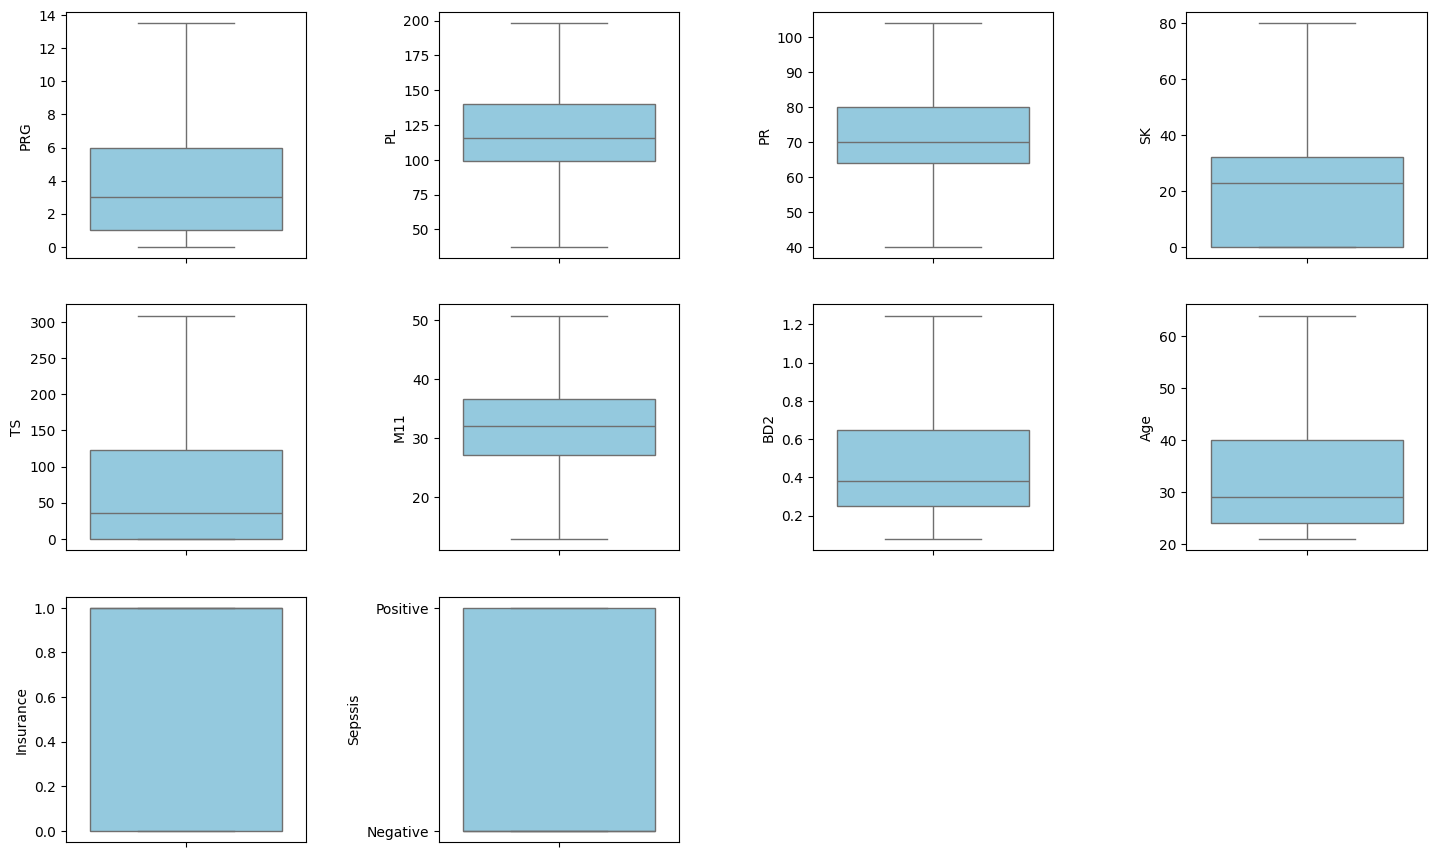

In [60]:
plt.figure(figsize=(15, 15))

pfiles_df1_noid = pfiles_df1.drop(['ID'], axis=1)

# plotting box plot
for i, variable in enumerate(pfiles_df1_noid):
    plt.subplot(5,4, i + 1)
    sns.boxplot(pfiles_df1_noid,y=pfiles_df1_noid[variable], color= 'skyblue')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)


#### Dataset Splitting

In [48]:
# Splitting to X and y
X = pfiles_df1.drop(columns=['ID', 'Sepssis']) 

y = pfiles_df1['Sepssis'] 

In [49]:
# checking for missing values
X.isnull().sum()

PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [50]:
# checking for missing values
y.isnull().sum()

np.int64(0)

In [51]:
# Splitting the data into training and evaluation sets for both features and labels
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [52]:
print(f'X_train shape: {X_train.shape}\nX_eval shape: {X_eval.shape}\ny_train shape: {y_train.shape}\ny_eval shape: {y_eval.shape}')

X_train shape: (449, 9)
X_eval shape: (150, 9)
y_train shape: (449,)
y_eval shape: (150,)


#### Label Encoding

In [53]:
#Encoding dependent variables
encoder=LabelEncoder()

y_train_encode=encoder.fit_transform(y_train)
y_eval_encode=encoder.transform(y_eval)

Normalising the variables


In [54]:
numerical_cols=X_train.select_dtypes(include='number').columns

#numerical pipeline

num_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('log_transform', LogTransformer()),
    #('num_scaler', RobustScaler()),
    #('num_scalerS', StandardScaler())
])


preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, numerical_cols)
])

#### Models

In [55]:
# models to be used
models={}
models['Logistic_Regression']= LogisticRegression(random_state=42)
models['Support_Vector_Machine']= LinearSVC(random_state=42)
models['Decision_Tree']= DecisionTreeClassifier(random_state=42)
models['Random_Forest']= RandomForestClassifier(random_state=42)
models['Naive_Bayes']= GaussianNB()
models['K-Nearest_Neighbors']= KNeighborsClassifier()
models['Gradient_Boosting']= GradientBoostingClassifier(random_state=42)
models['XGBoost']= XGBClassifier(random_state=42)


### Modeling Unbalanced Data

In [56]:
# Creating Pipeline

all_pipelines_unbalanced = {}
metric_table_unbalanced = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in models.items(): 
    unbalanced_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor), 
        ('classifier', classifier)  
    ])
        
    unbalanced_pipeline.fit(X_train, y_train_encode)
    all_pipelines_unbalanced[model_name] = unbalanced_pipeline
    
    y_pred=unbalanced_pipeline.predict(X_eval)
    
    metrics= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table_unbalanced.loc[len(metric_table_unbalanced)]=[model_name, accuracy, precision, recall, f1_score]

metric_table_unbalanced.sort_values(by='f1-score', ascending=False)

,model_name,accuracy,precision,recall,f1-score
6,Gradient_Boosting,0.766667,0.761481,0.766667,0.762270
4,Naive_Bayes,0.760000,0.755033,0.760000,0.756217
3,Random_Forest,0.746667,0.740057,0.746667,0.741078
0,Logistic_Regression,0.746667,0.739259,0.746667,0.739340
5,K-Nearest_Neighbors,0.733333,0.731067,0.733333,0.732066
1,Support_Vector_Machine,0.740000,0.733012,0.740000,0.722430
7,XGBoost,0.693333,0.693333,0.693333,0.693333
2,Decision_Tree,0.693333,0.680424,0.693333,0.682179


### Modeling balanced Data

In [57]:
# Creating Pipeline

all_pipelines_balanced= {}
metric_table_balanced = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in models.items(): 
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)), 
        ('classifier', classifier)  
    ])
        
    balanced_pipeline.fit(X_train, y_train_encode)
    all_pipelines_balanced[model_name] = balanced_pipeline
    
    y_pred=balanced_pipeline.predict(X_eval)
    
    metrics= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics['accuracy']
    precision=metrics['weighted avg']['precision']
    recall=metrics['weighted avg']['recall']
    f1_score=metrics['weighted avg']['f1-score']
    
    metric_table_balanced.loc[len(metric_table_balanced)]=[model_name, accuracy, precision, recall, f1_score]

metric_table_balanced.sort_values(by='f1-score', ascending=False)

,model_name,accuracy,precision,recall,f1-score
6,Gradient_Boosting,0.773333,0.778126,0.773333,0.775170
0,Logistic_Regression,0.766667,0.776097,0.766667,0.769703
1,Support_Vector_Machine,0.760000,0.767961,0.760000,0.762756
4,Naive_Bayes,0.740000,0.757300,0.740000,0.744705
3,Random_Forest,0.740000,0.746772,0.740000,0.742560
7,XGBoost,0.693333,0.699281,0.693333,0.695818
2,Decision_Tree,0.666667,0.680000,0.666667,0.671479
5,K-Nearest_Neighbors,0.660000,0.692059,0.660000,0.667739


#### Hyperparameters tuning

Tuning unbalanced data


In [ ]:
# Define preprocessor pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeliner', num_pipeline, numerical_cols),
    
])

# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        (model_name.lower().replace(' ', '_'), model)
    ])

# Define parameter grids for each model
param_grids = {
    'Logistic_Regression': {
        'logistic_regression__C': [1, 2, 3], 
        'logistic_regression__random_state':[1,2,3,4], 
        'logistic_regression__solver': ['newton-cg'], 
        'logistic_regression__multi_class': ['multinomial']},
    'Support_Vector_Machine': {
        'support_vector_machine__C': [1, 2, 3, 4, 5], 
        'support_vector_machine__random_state':[1,2,3,4]},
    
    'Decision_Tree': {
        'decision_tree__max_depth': [2, 3, 4, 5, 6], 
        'decision_tree__random_state':[1,2,3,4,5], 
        'decision_tree__criterion': ['gini', 'entropy'], 
        'decision_tree__splitter': ['best', 'random'], 
        'decision_tree__max_features': ['sqrt', 'log2']},

    'Random_Forest': {
        'random_forest__n_estimators': [2, 5, 10, 15, 20], 
        'random_forest__max_depth': [5, 10, 20, 30], 
        'random_forest__random_state':[1,10,11,12,13,14], 
        'random_forest__criterion': ['gini', 'entropy'], 
        'random_forest__max_features': ['sqrt', 'log2'], 
        'random_forest__bootstrap': [True, False], 
        'random_forest__oob_score': [True, False]},
    
    'Gradient_Boosting': {
        'gradient_boosting__n_estimators': [10, 20, 30, 50, 60, 70], 
        'gradient_boosting__max_depth': [2, 3, 4, 5], 
        'gradient_boosting__learning_rate': [0.01, 0.1, 1], 
        'gradient_boosting__random_state':[1], 
        'gradient_boosting__loss': ['deviance', 'exponential'], 
        'gradient_boosting__criterion': ['friedman_mse', 'squared_error']},
    
    'XGBoost': {
        'xgboost__n_estimators': [20, 30, 40], 
        'xgboost__max_depth': [2, 3, 4, 5, 10], 
        'xgboost__random_state':[1,3, 5], 
        'xgboost__learning_rate': [0.001, 0.01, 0.1, 1], 
        'xgboost__booster': ['gbtree', 'gblinear'], 
        'xgboost__verbosity': [0]}

}

# Perform grid search for each model
for model_name, pipeline in pipelines.items():
    if model_name in ['Logistic_Regression', 'Support_Vector_Machine', 'Decision_Tree', 'Random_Forest', 'Gradient_Boosting', 'XGBoost']:
        print(f"\nTuning {model_name}...")
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='f1_weighted', n_jobs=-1)
        grid_search.fit(X_train, y_train_encode)  
    
    # Print best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

Tuned unbalanced models

In [ ]:
tuned_models={}
tuned_models['Logistic_Regression_tunedub'] = LogisticRegression(C=3, multi_class='multinomial', solver='newton-cg', random_state=1)
tuned_models['Support_Vector_Machine_tunedub']= LinearSVC(C=5, random_state=1)
tuned_models['Decision_Tree_tunedub'] = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt', splitter='best', random_state=1)
tuned_models['Random_Forest_tunedub'] = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10, max_features='sqrt', n_estimators=10, oob_score=False, random_state=13)
tuned_models['Naive_Bayes_tunedub'] = GaussianNB()
tuned_models['K-Nearest_Neighbors_tunedub'] = KNeighborsClassifier()
tuned_models['Gradient_Boosting_tunedub'] = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.1, loss='exponential', max_depth=2, n_estimators=30, random_state=1)
tuned_models['XGBoost_tunedub'] = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=2, n_estimators=30, verbosity=0, random_state=1)

In [ ]:
# Creating Pipeline

all_tuned_pipelines_unbalanced = {}
metric_table_tuned_unbalanced = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in tuned_models.items(): 
    tuned_unbalanced_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor), 
        ('classifier', classifier)  
    ])
        
    tuned_unbalanced_pipeline.fit(X_train, y_train_encode)
    all_tuned_pipelines_unbalanced[model_name] = tuned_unbalanced_pipeline
    
    y_pred=tuned_unbalanced_pipeline.predict(X_eval)
    
    metrics_tuned= classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=metrics_tuned['accuracy']
    precision=metrics_tuned['weighted avg']['precision']
    recall=metrics_tuned['weighted avg']['recall']
    f1_score=metrics_tuned['weighted avg']['f1-score']
    
    metric_table_tuned_unbalanced.loc[len(metric_table_tuned_unbalanced)]=[model_name, accuracy, precision, recall, f1_score]

metric_table_tuned_unbalanced.sort_values(by='f1-score', ascending=False)

,model_name,accuracy,precision,recall,f1-score
4,Naive_Bayes_tunedub,0.760000,0.755033,0.760000,0.756217
5,K-Nearest_Neighbors_tunedub,0.733333,0.731067,0.733333,0.732066
0,Logistic_Regression_tunedub,0.733333,0.726015,0.733333,0.727451
1,Support_Vector_Machine_tunedub,0.733333,0.724956,0.733333,0.725621
7,XGBoost_tunedub,0.726667,0.723268,0.726667,0.724668
6,Gradient_Boosting_tunedub,0.726667,0.719704,0.726667,0.721517
3,Random_Forest_tunedub,0.726667,0.717330,0.726667,0.717764
2,Decision_Tree_tunedub,0.706667,0.693222,0.706667,0.682118


Tuning on balanced data

In [ ]:
# Define preprocessor pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeliner', num_pipeline, numerical_cols),
])

# Create pipelines for each model
pipelines = {}
for model_name, model in models.items():
    pipelines[model_name] = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)),
        (model_name.lower().replace(' ', '_'), model)
    ])

# Define parameter grids for each model
param_grids = {
    'Logistic_Regression': {
        'logistic_regression__C': [1, 2, 3], 
        'logistic_regression__random_state':[1,2,3,4], 
        'logistic_regression__solver': ['newton-cg'], 
        'logistic_regression__multi_class': ['multinomial']},
    'Support_Vector_Machine': {
        'support_vector_machine__C': [1, 2, 3, 4, 5], 
        'support_vector_machine__random_state':[1,2,3,4]},
    
    'Decision_Tree': {
        'decision_tree__max_depth': [2, 3, 4, 5, 6], 
        'decision_tree__random_state':[1,2,3,4,5], 
        'decision_tree__criterion': ['gini', 'entropy'], 
        'decision_tree__splitter': ['best', 'random'], 
        'decision_tree__max_features': ['sqrt', 'log2']},

    'Random_Forest': {
        'random_forest__n_estimators': [2, 5, 10, 15, 20], 
        'random_forest__max_depth': [5, 10, 20, 30], 
        'random_forest__random_state':[1,10,11,12,13,14], 
        'random_forest__criterion': ['gini', 'entropy'], 
        'random_forest__max_features': ['sqrt', 'log2'], 
        'random_forest__bootstrap': [True, False], 
        'random_forest__oob_score': [True, False]},
    
    'Gradient_Boosting': {
        'gradient_boosting__n_estimators': [10, 20, 30, 50, 60, 70], 
        'gradient_boosting__max_depth': [2, 3, 4, 5], 
        'gradient_boosting__learning_rate': [0.01, 0.1, 1], 
        'gradient_boosting__random_state':[1], 
        'gradient_boosting__loss': ['deviance', 'exponential'], 
        'gradient_boosting__criterion': ['friedman_mse', 'squared_error']},
    
    'XGBoost': {
        'xgboost__n_estimators': [20, 30, 40], 
        'xgboost__max_depth': [2, 3, 4, 5, 10], 
        'xgboost__random_state':[1,3, 5], 
        'xgboost__learning_rate': [0.001, 0.01, 0.1, 1], 
        'xgboost__booster': ['gbtree', 'gblinear'], 
        'xgboost__verbosity': [0]}

}

# Perform grid search for each model
for model_name, pipeline in pipelines.items():
    if model_name in ['Logistic_Regression', 'Support_Vector_Machine', 'Decision_Tree', 'Random_Forest', 'Gradient_Boosting', 'XGBoost']:
        print(f"\nTuning {model_name}...")
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='f1_weighted', n_jobs=-1)
        grid_search.fit(X_train, y_train_encode)  
    
    # Print best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)


Tuning Logistic_Regression...


Best parameters: {'logistic_regression__C': 1, 'logistic_regression__multi_class': 'multinomial', 'logistic_regression__random_state': 1, 'logistic_regression__solver': 'newton-cg'}
Best score: 0.7333240171517981

Tuning Support_Vector_Machine...
Best parameters: {'support_vector_machine__C': 5, 'support_vector_machine__random_state': 1}
Best score: 0.71343638313684

Tuning Decision_Tree...
Best parameters: {'decision_tree__criterion': 'gini', 'decision_tree__max_depth': 4, 'decision_tree__max_features': 'sqrt', 'decision_tree__random_state': 2, 'decision_tree__splitter': 'best'}
Best score: 0.7325387399491545

Tuning Random_Forest...
Best parameters: {'random_forest__bootstrap': True, 'random_forest__criterion': 'gini', 'random_forest__max_depth': 5, 'random_forest__max_features': 'sqrt', 'random_forest__n_estimators': 10, 'random_forest__oob_score': True, 'random_forest__random_state': 14}
Best score: 0.7779815640897124
Best parameters: {'random_forest__bootstrap': True, 'random_fore

Tuned balanced Models

In [ ]:
# tuned models to be used
tuned_models_balanced = {}
tuned_models_balanced['Logistic_Regression_tunedb'] = LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg', random_state=1)
tuned_models_balanced['Support_Vector_Machine_tunedb'] = LinearSVC(C=5, random_state=1)
tuned_models_balanced['Decision_Tree_tunedb'] = DecisionTreeClassifier(criterion='gini', max_depth=4, max_features='sqrt', splitter='best', random_state=1)
tuned_models_balanced['Random_Forest_tunedb'] = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=5, max_features='sqrt', n_estimators=10, oob_score=True, random_state=14)
tuned_models_balanced['Naive_Bayes_tunedb'] = GaussianNB()
tuned_models_balanced['K-Nearest_Neighbors_tunedb'] = KNeighborsClassifier()
tuned_models_balanced['Gradient_Boosting_tunedb'] = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=1, loss='exponential', max_depth=5, n_estimators=10, random_state=1)
tuned_models_balanced['XGBoost_tunedb'] = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=4, n_estimators=20, verbosity=0, random_state=1)

In [ ]:

# Creating Pipeline

all_tuned_pipelines_balanced= {}
metric_table_balanced_tuned = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in tuned_models_balanced.items(): 
    tuned_balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)), 
        ('classifier', classifier)  
    ])
        
    tuned_balanced_pipeline.fit(X_train, y_train_encode)
    all_tuned_pipelines_balanced[model_name] = tuned_balanced_pipeline
    
    y_pred = tuned_balanced_pipeline.predict(X_eval)
    
    metrics_tunedb = classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy = metrics_tunedb['accuracy']
    precision = metrics_tunedb['weighted avg']['precision']
    recall = metrics_tunedb['weighted avg']['recall']
    f1_score = metrics_tunedb['weighted avg']['f1-score']
    
    metric_table_balanced_tuned.loc[len(metric_table_balanced_tuned)] = [model_name, accuracy, precision, recall, f1_score]

metric_table_balanced_tuned.sort_values(by='f1-score', ascending=False)

,model_name,accuracy,precision,recall,f1-score
1,Support_Vector_Machine_tunedb,0.786667,0.797333,0.786667,0.789747
7,XGBoost_tunedb,0.766667,0.779542,0.766667,0.770344
0,Logistic_Regression_tunedb,0.766667,0.776097,0.766667,0.769703
4,Naive_Bayes_tunedb,0.740000,0.757300,0.740000,0.744705
3,Random_Forest_tunedb,0.740000,0.753494,0.740000,0.744097
2,Decision_Tree_tunedb,0.726667,0.773689,0.726667,0.733248
6,Gradient_Boosting_tunedb,0.706667,0.722820,0.706667,0.711647
5,K-Nearest_Neighbors_tunedb,0.660000,0.692059,0.660000,0.667739


In [ ]:
# conmcatenating our best models
df_best_models = pd.concat([metric_table_balanced, metric_table_balanced_tuned], ignore_index= True).sort_values(by='f1-score', ascending=False).head(4)

df_best_models

,model_name,accuracy,precision,recall,f1-score
9,Support_Vector_Machine_tunedb,0.786667,0.797333,0.786667,0.789747
6,Gradient_Boosting,0.773333,0.778126,0.773333,0.775170
15,XGBoost_tunedb,0.766667,0.779542,0.766667,0.770344
0,Logistic_Regression,0.766667,0.776097,0.766667,0.769703


### Observations

The best models are 

- **Support_Vector_Machine_tunedb** recording F1 score of 0.789747 and Precision score of 0.797333
- **Gradient_Boosting** recording F1 score of 0.775170 and Precision score of 0.778126
- **XGBoost_tunedb** recording F1 score of 0.770344 and Precision score of 0.779542
- **Logistic_Regression** recording F1 score os 0.769703 and Precision score of 0.776097



In [ ]:
# best models

all_best_models = {}

all_best_models['Gradient_Boosting'] = GradientBoostingClassifier(random_state=42)
all_best_models['XGBoost_tunedb'] = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=4, n_estimators=20, verbosity=0, random_state=1)
all_best_models['Support_Vector_Machine_tunedb'] =  LinearSVC(C=5, random_state=1)
all_best_models['Logistic_Regression'] = LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg', random_state=1)

#confusion_matrix(y_eval_encode, all_pipelines_balanced['Gradient_Boosting'].predict(X_eval))

**Plotting confusion metrix of tuned models for balanced labels** 

In [ ]:
#  confusion metrix 
best_confusion_matrices = {}
best_pipelines = {}
best_metric_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1-score'])

for model_name, classifier in all_best_models.items(): 
    best_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=5)), 
        ('classifier', classifier)  
    ])
        
    best_pipeline.fit(X_train, y_train_encode)
    best_pipelines[model_name] = best_pipeline
    
    y_pred=best_pipeline.predict(X_eval)
    
    best_conf_matrix = confusion_matrix(y_eval_encode, y_pred)
    
    best_confusion_matrices[model_name] = best_conf_matrix
    
    best_metrics = classification_report(y_eval_encode, y_pred, output_dict=True)
    
    accuracy=best_metrics['accuracy']
    precision=best_metrics['weighted avg']['precision']
    recall=best_metrics['weighted avg']['recall']
    f1_score=best_metrics['weighted avg']['f1-score']
    
    best_metric_table.loc[len(best_metric_table)]=[model_name, accuracy, precision, recall, f1_score]

best_metric_table.sort_values(by='f1-score', ascending=False)

,model_name,accuracy,precision,recall,f1-score
2,Support_Vector_Machine_tunedb,0.786667,0.797333,0.786667,0.789747
0,Gradient_Boosting,0.773333,0.778126,0.773333,0.775170
1,XGBoost_tunedb,0.766667,0.779542,0.766667,0.770344
3,Logistic_Regression,0.766667,0.776097,0.766667,0.769703


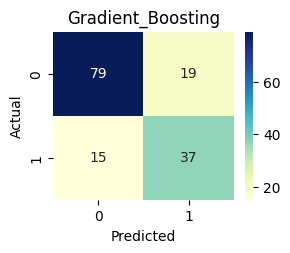

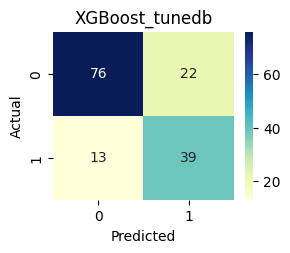

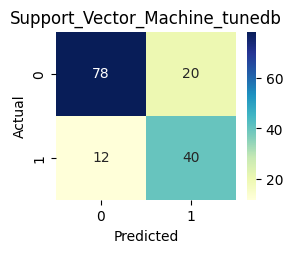

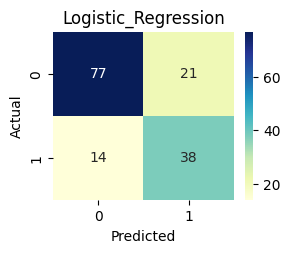

In [ ]:
for i, (model_name, confusion_mat) in enumerate(best_confusion_matrices.items()):
    # plotting confusion matrix
    plt.subplot(2, 2, i + 1)
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(model_name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

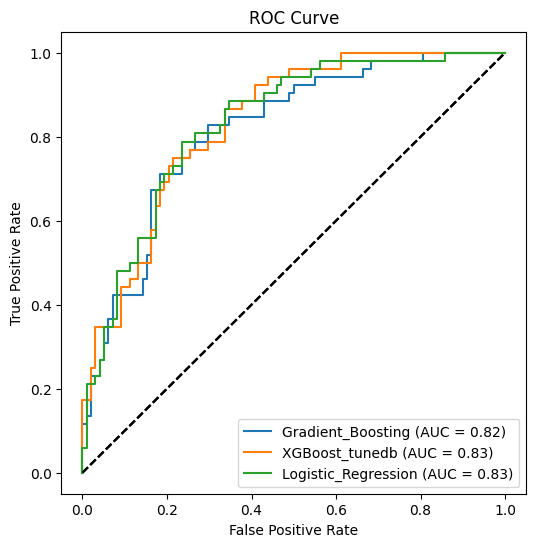

In [ ]:
# plotting roc curves
fig, ax = plt.subplots(figsize=(6, 6))
best_confusion_matrices = {}

all_roc_data = {}

# Iterate over the dictionary items directly
for model_name, pipeline in best_pipelines.items():
    
    # Check if the classifier is LinearSVC
    if isinstance(pipeline.named_steps['classifier'], LinearSVC):
        # Fit the pipeline first
        pipeline.fit(X_train, y_train_encode)
        # Wrap LinearSVC with CalibratedClassifierCV
        calibrated_pipeline = CalibratedClassifierCV(pipeline.named_steps['classifier'], method='sigmoid', cv='prefit')
        # Fit the CalibratedClassifierCV instance with training data
        calibrated_pipeline.fit(pipeline.named_steps['preprocessor'].transform(X_train), y_train_encode)
        y_score = calibrated_pipeline.predict_proba(pipeline.named_steps['preprocessor'].transform(X_eval))[:, 1]
    else:
        # For classifiers that have predict_proba directly
        y_score = pipeline.predict_proba(X_eval)[:, 1]
    
        fpr, tpr, thresholds = roc_curve(y_eval_encode, y_score)
        roc_auc = auc(fpr, tpr)
    
    
        roc_data_df = pd.DataFrame({'false_positive_rate': fpr, 'true_positive_rate': tpr, 'thresholds': thresholds})
    
        # Store the ROC data in the dictionary
        all_roc_data[model_name] = roc_data_df
        ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_ylabel('True Positive Rate')
        ax.set_xlabel('False Positive Rate')
        ax.set_title('ROC Curve')
        ax.legend(loc="lower right")
plt.show()


In [ ]:
# our best pipelines
best_pipelines 

{'Gradient_Boosting': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num_pipeliner',
                                                   Pipeline(steps=[('num_imputer',
                                                                    SimpleImputer()),
                                                                   ('log_transform',
                                                                    LogTransformer())]),
                                                   Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                 ('smote', SMOTE(random_state=5)),
                 ('classifier', GradientBoostingClassifier(random_state=42))]),
 'XGBoost_tunedb': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num_pipeliner',
                                                   Pipeline(steps=[('num_imputer',
                                                       

#### Best Performing Models per ROC Curves

- XGBoost_tunedb, Logistic_Regression,  Gradient_Boosting_tunedub, and Support_Vector_Machine_tunedb with AUC scores of 0.83, 0.83, 0.82 respectively

In [ ]:
all_roc_data['XGBoost_tunedb']

,false_positive_rate,true_positive_rate,thresholds
0,0.000000,0.000000,inf
1,0.000000,0.019231,0.878756
2,0.000000,0.173077,0.846371
3,0.020408,0.173077,0.839771
4,0.020408,0.250000,0.814545
5,0.030612,0.250000,0.811667
6,0.030612,0.346154,0.763904
7,0.040816,0.346154,0.754933
8,0.061224,0.346154,0.750469
9,0.091837,0.346154,0.736051


In [ ]:
XGB_pipeline = best_pipelines['XGBoost_tunedb']
XGB_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeliner',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   LogTransformer())]),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('smote', SMOTE(random_state=5)),
                ('classifier',
                 XGBClassifier(base_score=None, booster='gbtree',
                               callbac...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=20, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

<Axes: >

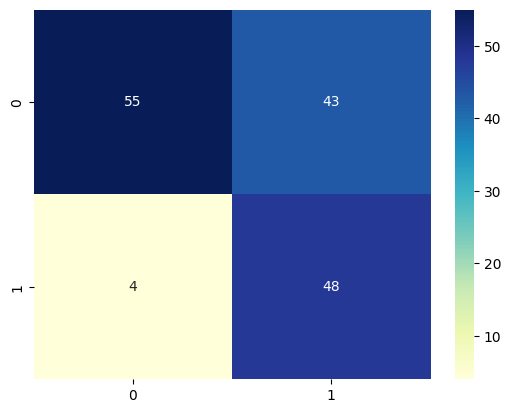

In [ ]:
threshold = 0.211421

y_pred_proba = XGB_pipeline.predict_proba(X_eval)[:, 1]

binary_predictions = (y_pred_proba >= threshold).astype(int)
threshold_matrix = confusion_matrix(y_eval_encode, binary_predictions)

sns.heatmap(threshold_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
all_roc_data['Gradient_Boosting'].tail(40)

,false_positive_rate,true_positive_rate,thresholds
8,0.040816,0.269231,0.860363
9,0.051020,0.269231,0.858536
10,0.051020,0.307692,0.856841
11,0.061224,0.307692,0.846876
12,0.061224,0.365385,0.817096
13,0.071429,0.365385,0.816501
14,0.071429,0.423077,0.811215
15,0.142857,0.423077,0.741465
16,0.142857,0.461538,0.692824
17,0.153061,0.461538,0.685510


In [ ]:
GB_pipeline = best_pipelines['Gradient_Boosting']
GB_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeliner',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   LogTransformer())]),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('smote', SMOTE(random_state=5)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

<Axes: >

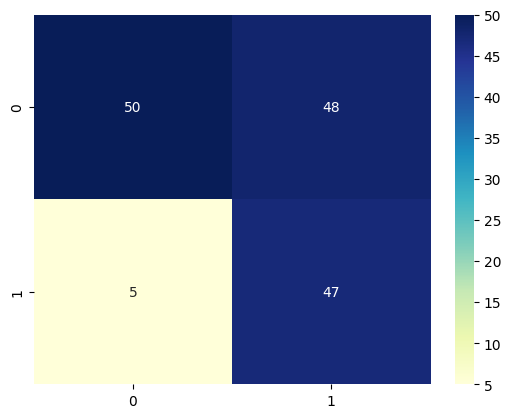

In [ ]:
threshold = 0.125342

y_pred_proba = GB_pipeline.predict_proba(X_eval)[:, 1]

binary_predictions = (y_pred_proba >= threshold).astype(int)
GB_threshold_matrix = confusion_matrix(y_eval_encode, binary_predictions)

sns.heatmap(GB_threshold_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
all_roc_data['Logistic_Regression']

,false_positive_rate,true_positive_rate,thresholds
0,0.000000,0.000000,inf
1,0.000000,0.019231,0.968985
2,0.000000,0.057692,0.931726
3,0.010204,0.057692,0.924760
4,0.010204,0.211538,0.876367
5,0.030612,0.211538,0.872912
6,0.030612,0.230769,0.867147
7,0.040816,0.230769,0.849107
8,0.040816,0.269231,0.823745
9,0.051020,0.269231,0.818419


In [ ]:
LogReg_pipeline = best_pipelines['Logistic_Regression']
LogReg_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeliner',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   LogTransformer())]),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('smote', SMOTE(random_state=5)),
                ('classifier',
                 LogisticRegression(C=1, multi_class='multinomial',
                                    random_state=1, solver='newton-cg'))])

<Axes: >

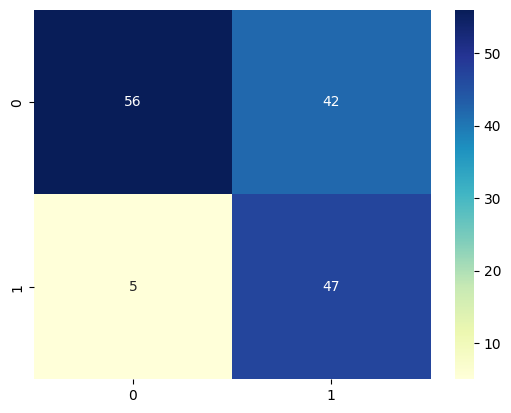

In [ ]:
threshold = 0.295268

y_pred_proba = LogReg_pipeline.predict_proba(X_eval)[:, 1]

binary_predictions = (y_pred_proba >= threshold).astype(int)
LR_threshold_matrix = confusion_matrix(y_eval_encode, binary_predictions)

sns.heatmap(LR_threshold_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
SVM_pipeline = best_pipelines['Support_Vector_Machine_tunedb']
SVM_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeliner',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   LogTransformer())]),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('smote', SMOTE(random_state=5)),
                ('classifier', LinearSVC(C=5, random_state=1))])

#### Testing the model with the XGB_pipeline

In [ ]:
# creating dtaaframe for test data
pfiles_test = pd.read_csv('../Data/Paitients_Files_Test.csv')
pfiles_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [ ]:
# size of test data
pfiles_test.shape

(169, 10)

In [ ]:
# info on test data
pfiles_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [ ]:
# checking for missing values
pfiles_test.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

### Predicting with XGBoost Pipeline

In [ ]:
# predicting with XGboost
XGB_pred_Sepsis = XGB_pipeline.predict(pfiles_test)
XGB_pred_Sepsis 

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
# transforming our encoded prediction
encoder.inverse_transform(XGB_pred_Sepsis)

array(['Negative', 'Negative', 'Negative', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Negative', 'Negative', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negati

In [ ]:
pfiles_test['XGB_sepsis'] = encoder.inverse_transform(XGB_pred_Sepsis)
pfiles_test.head(10)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,XGB_sepsis
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,Negative
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,Negative
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,Negative
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,Negative
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,Positive
5,ICU200614,4,183,0,0,0,28.4,0.212,36,1,Positive
6,ICU200615,1,124,60,32,0,35.8,0.514,21,1,Negative
7,ICU200616,1,181,78,42,293,40.0,1.258,22,1,Positive
8,ICU200617,1,92,62,25,41,19.5,0.482,25,0,Negative
9,ICU200618,0,152,82,39,272,41.5,0.270,27,0,Positive


#### Predicting with GB_pipeline

In [ ]:
# predicting with Gradient boosting
GB_pred_Sepsis = GB_pipeline.predict(pfiles_test)
GB_pred_Sepsis

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
# transforming our encoded prediction
pfiles_test['GB_sepsis'] = encoder.inverse_transform(GB_pred_Sepsis)

pfiles_test.head(10)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,XGB_sepsis,GB_sepsis
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,Negative,Negative
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,Negative,Negative
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,Negative,Negative
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,Negative,Negative
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,Positive,Positive
5,ICU200614,4,183,0,0,0,28.4,0.212,36,1,Positive,Positive
6,ICU200615,1,124,60,32,0,35.8,0.514,21,1,Negative,Negative
7,ICU200616,1,181,78,42,293,40.0,1.258,22,1,Positive,Positive
8,ICU200617,1,92,62,25,41,19.5,0.482,25,0,Negative,Negative
9,ICU200618,0,152,82,39,272,41.5,0.270,27,0,Positive,Positive


#### Predicting with LogReg_pipeline

In [ ]:
# predictiong with log regression
LR_pred_sepsis = LogReg_pipeline.predict(pfiles_test)
LR_pred_sepsis

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [ ]:
# transforming our encoded prediction
pfiles_test['LR_sepsis'] = encoder.inverse_transform(LR_pred_sepsis)

pfiles_test.head(10)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,XGB_sepsis,GB_sepsis,LR_sepsis
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,Negative,Negative,Negative
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,Negative,Negative,Negative
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,Negative,Negative,Negative
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,Negative,Negative,Negative
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,Positive,Positive,Positive
5,ICU200614,4,183,0,0,0,28.4,0.212,36,1,Positive,Positive,Positive
6,ICU200615,1,124,60,32,0,35.8,0.514,21,1,Negative,Negative,Negative
7,ICU200616,1,181,78,42,293,40.0,1.258,22,1,Positive,Positive,Positive
8,ICU200617,1,92,62,25,41,19.5,0.482,25,0,Negative,Negative,Negative
9,ICU200618,0,152,82,39,272,41.5,0.270,27,0,Positive,Positive,Positive


#### Predicting with Support Vector Machine pipeline

In [ ]:
# predicting with support vector machine pipeline
SVM_pred_sepsis = SVM_pipeline.predict(pfiles_test)
SVM_pred_sepsis

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [ ]:
# transforming our encoded prediction
pfiles_test['SVM_sepsis'] = encoder.inverse_transform(SVM_pred_sepsis)

pfiles_test.head(10)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,XGB_sepsis,GB_sepsis,LR_sepsis,SVM_sepsis
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,Negative,Negative,Negative,Negative
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,Negative,Negative,Negative,Negative
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,Negative,Negative,Negative,Positive
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,Negative,Negative,Negative,Negative
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,Positive,Positive,Positive,Positive
5,ICU200614,4,183,0,0,0,28.4,0.212,36,1,Positive,Positive,Positive,Positive
6,ICU200615,1,124,60,32,0,35.8,0.514,21,1,Negative,Negative,Negative,Positive
7,ICU200616,1,181,78,42,293,40.0,1.258,22,1,Positive,Positive,Positive,Positive
8,ICU200617,1,92,62,25,41,19.5,0.482,25,0,Negative,Negative,Negative,Negative
9,ICU200618,0,152,82,39,272,41.5,0.270,27,0,Positive,Positive,Positive,Positive


Saving the top 4 best performing models

In [ ]:
# saving the top 4 models
joblib.dump(XGB_pipeline, '../models/XGB_pipeline.joblib')
joblib.dump(GB_pipeline, '../models/GB_pipeline.joblib')
joblib.dump(LogReg_pipeline, '../models/LogReg_pipeline.joblib')
joblib.dump(SVM_pipeline, '../models/SVM_pipeline.joblib')
joblib.dump(encoder, '../models/encoder.joblib')

['../models/encoder.joblib']

## Recommendation

Due to the dangerous nature of Sepsis, it will be bad for the model to have high fpr, it will therefore be helpful to reduce fpr as much as possible.